 <strong style="color: blue; font-size: 24px;">IMPORTATION DES PACKAGES</strong>

In [1]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import matplotlib
import seaborn as sns  
import statsmodels.api as sm
import missingno as msno
from imblearn.over_sampling import SMOTE  
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2  
from scipy.stats import pointbiserialr
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.tools.tools import add_constant   
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from optbinning import OptimalBinning 

%matplotlib inline
sns.set_theme(style="whitegrid")       

In [2]:
df_hmeq = pd.read_csv('hmeq.csv')
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df_hmeq.shape

(5960, 13)

In [4]:
print(df_hmeq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None


<strong style="color: white;">Il n'existe que deux variables catégorielles à savoir la variable cible BAD, REASON et JOB, les autres étant toutes quantitatives</strong>

In [5]:
print(df_hmeq.describe().T)

          count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.

In [6]:
print(df_hmeq.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [7]:
# pourcentage des valeurs manquantes pour chaque colonne
percent_missing = df_hmeq.isnull().sum() * 100 / len(df_hmeq)
val_manq = pd.DataFrame({'variable': df_hmeq.columns, 'pct_val_manq': percent_missing})

val_manq.sort_values('pct_val_manq', inplace=True, ascending=False)
print(val_manq)

        variable  pct_val_manq
DEBTINC  DEBTINC     21.258389
DEROG      DEROG     11.879195
DELINQ    DELINQ      9.731544
MORTDUE  MORTDUE      8.691275
YOJ          YOJ      8.640940
NINQ        NINQ      8.557047
CLAGE      CLAGE      5.167785
JOB          JOB      4.681208
REASON    REASON      4.228188
CLNO        CLNO      3.724832
VALUE      VALUE      1.879195
BAD          BAD      0.000000
LOAN        LOAN      0.000000


C:\Users\dumas\AppData\Local\Temp\ipykernel_12084\909055384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='pct_val_manq', y='variable', data=val_manq, palette='viridis')


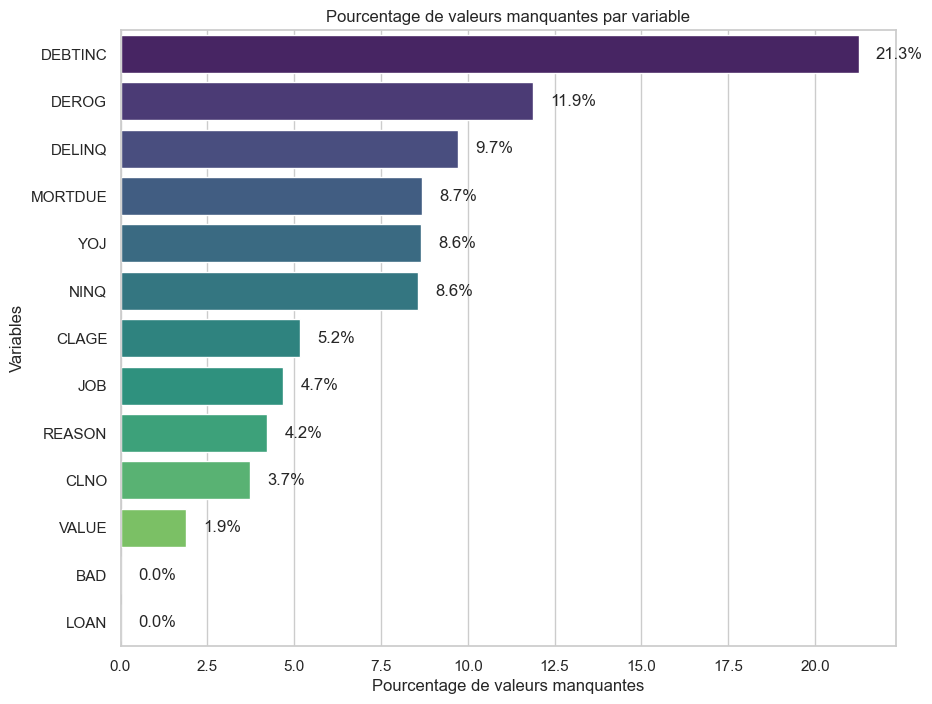

In [8]:
#barplot des taux de valeurs manquantes par variable

plt.figure(figsize=(10, 8)) 
barplot = sns.barplot(x='pct_val_manq', y='variable', data=val_manq, palette='viridis')

for p in barplot.patches:
    width = p.get_width()   
    plt.text(x=width + 0.5, y=p.get_y() + p.get_height() / 2, s='{:.1f}%'.format(width), va='center')  

plt.title('Pourcentage de valeurs manquantes par variable')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.ylabel('Variables')

plt.show()

<strong style="color: white;">Les variables comportant des valeurs manquantes sont :</strong>
<ul style="color: white;">
  <li>DEBTINC (21%)</li>
  <li>DEROG (12%)</li>
  <li>DELINQ (10%)</li>
  <li>MORTDUE (9%)</li>
  <li>YOJ (9%)</li>
  <li>NINQ (9%)</li>
  <li>CLAGE (5%)</li>
  <li>JOB (5%)</li>
  <li>REASON (4%)</li>
  <li>CLNO (4%)</li>
  <li>VALUE (2%)</li> 
</ul>

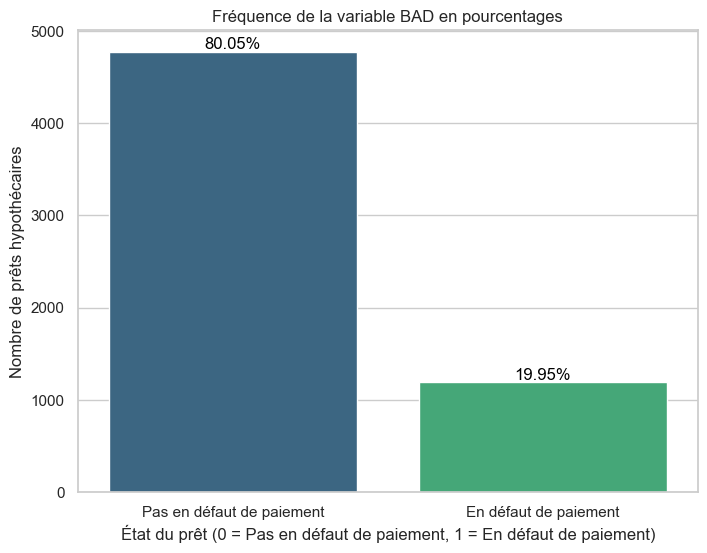

In [9]:
# On calcule la fréquence de la variable BAD
bad_freq = df_hmeq['BAD'].value_counts().sort_index()
total = bad_freq.sum()
percentages = (bad_freq / total * 100).round(2)
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=bad_freq.index, y=bad_freq.values, palette='viridis', hue=bad_freq.index.astype(str), legend=False)
for index, value in enumerate(bad_freq):
    plt.text(index, value, f'{percentages[index]}%', color='black', ha='center', va='bottom')

plt.title('Fréquence de la variable BAD en pourcentages')
plt.xlabel('État du prêt (0 = Pas en défaut de paiement, 1 = En défaut de paiement)')
plt.ylabel('Nombre de prêts hypothécaires')
plt.xticks([0, 1], ['Pas en défaut de paiement', 'En défaut de paiement'])

plt.show()

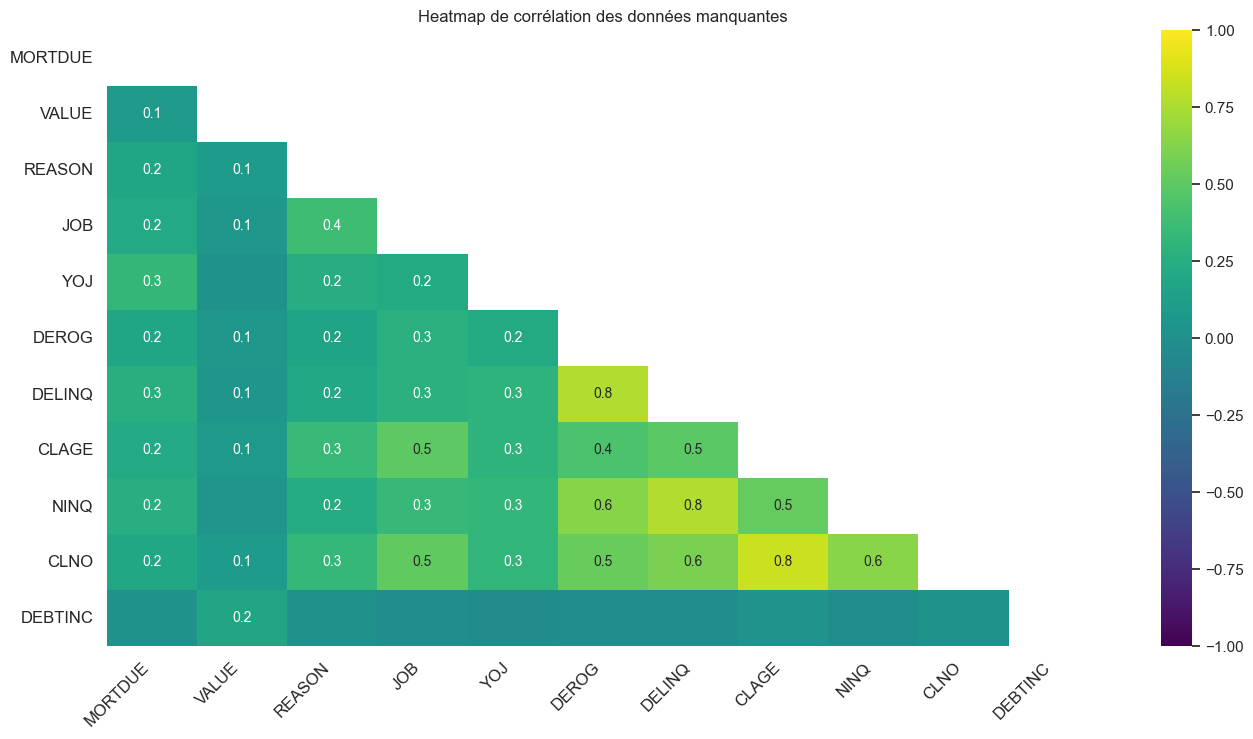

In [10]:
# Heatmap pour visualiser la corrélation des données manquantes
msno.heatmap(df_hmeq, figsize=(16,8), cmap="viridis", fontsize=12).grid(False)
plt.title('Heatmap de corrélation des données manquantes')
plt.show()

<strong style="color: blue; font-size: 24px;">VISUALISATIONS GRAPHIQUES</strong>

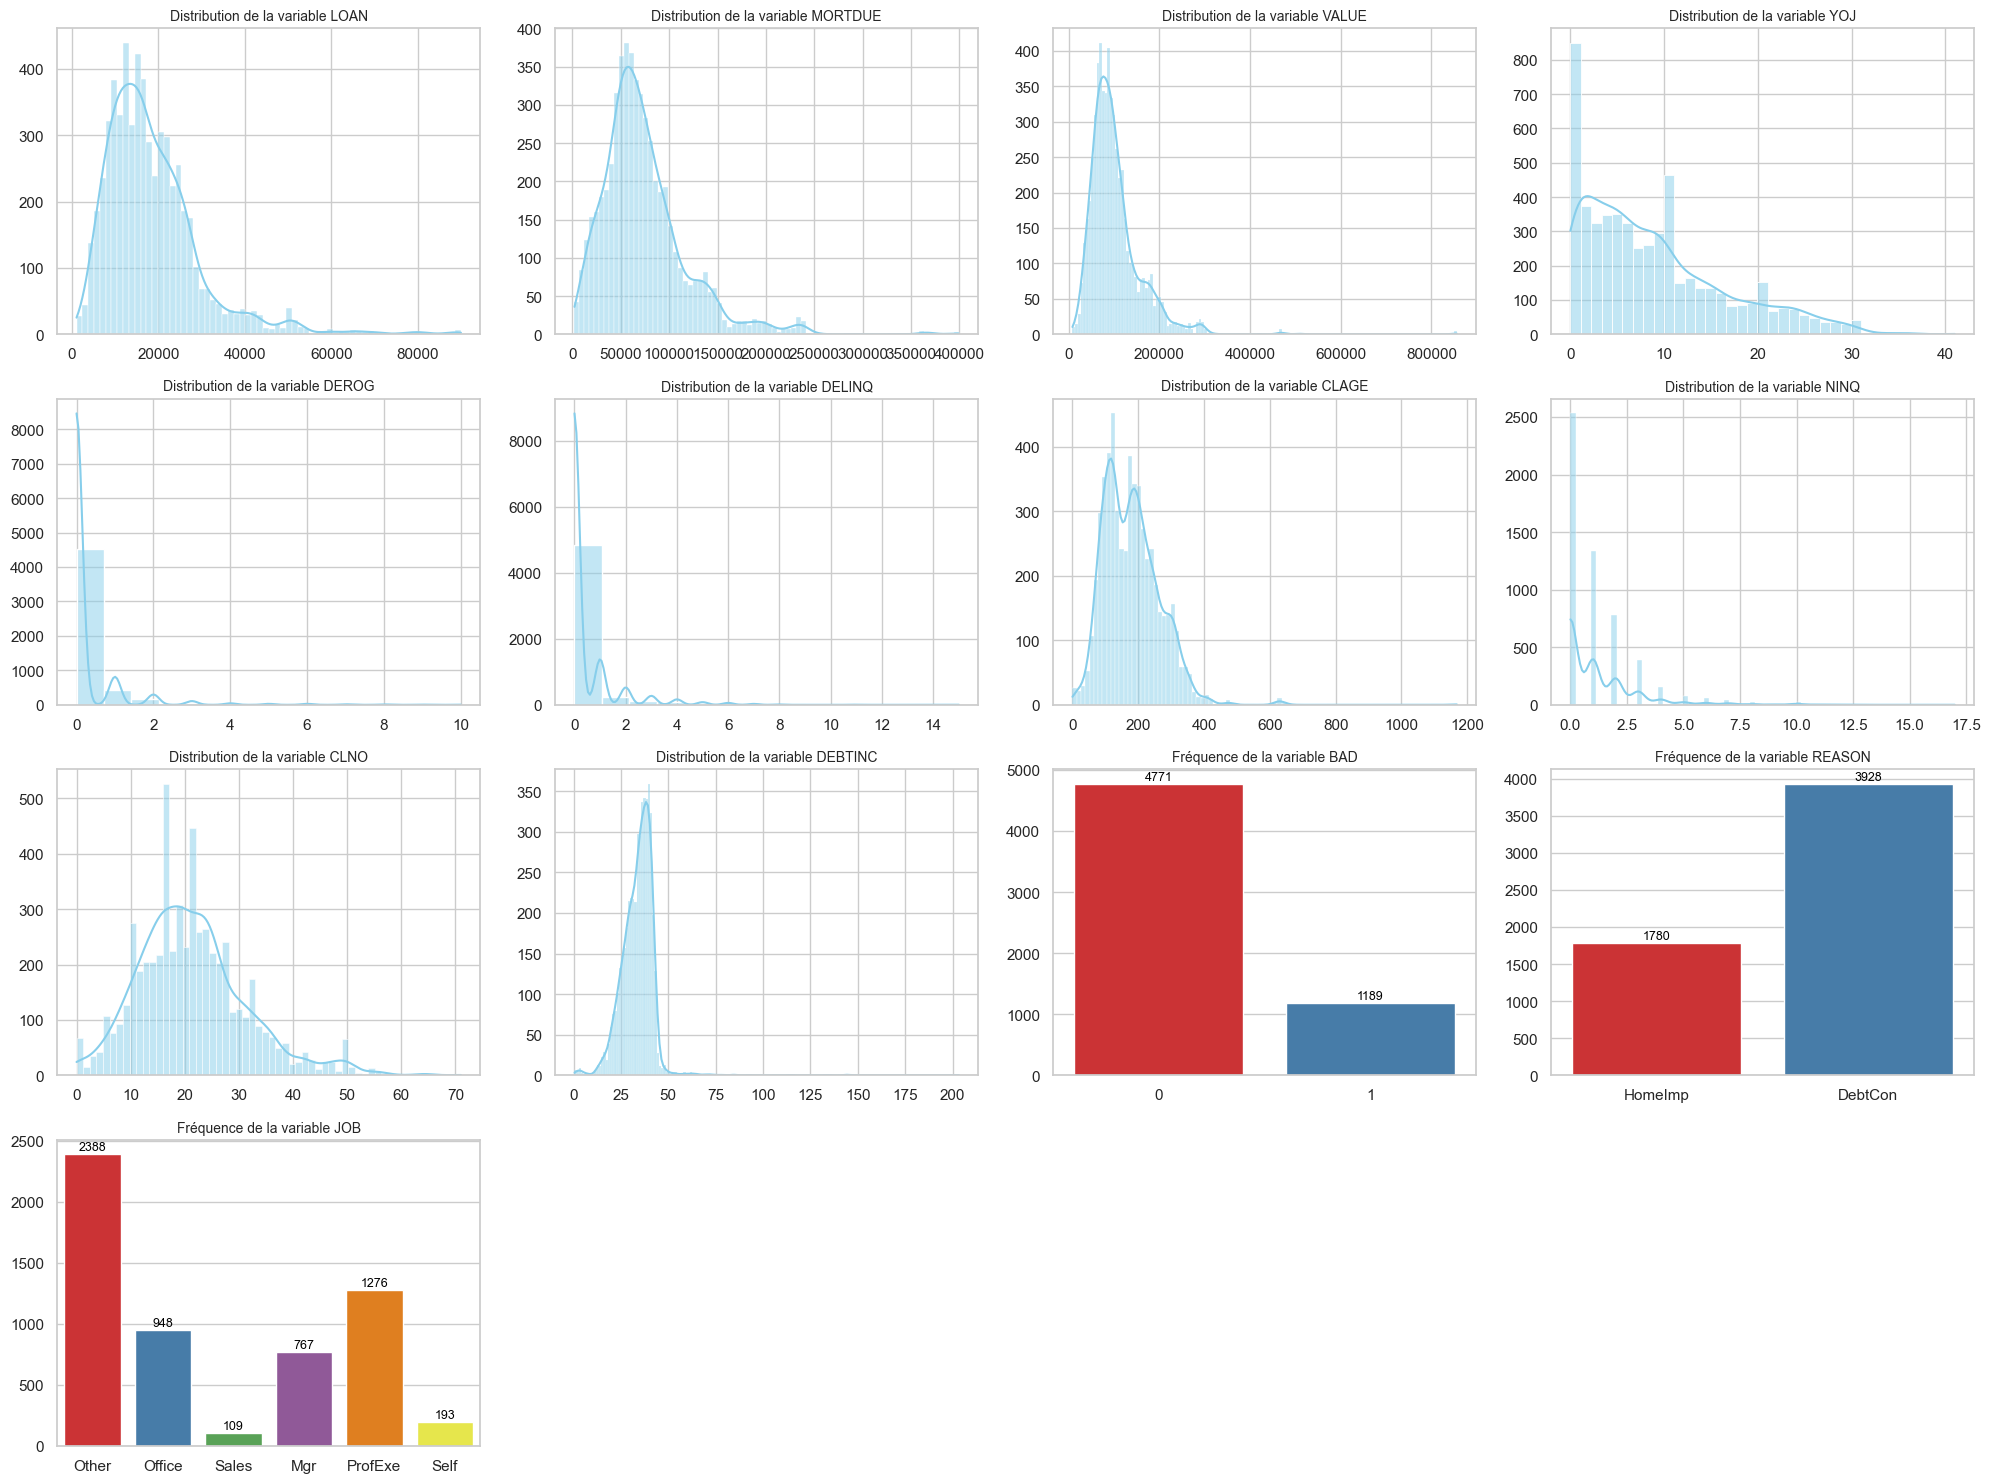

In [11]:
num_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
cat_vars = ['BAD', 'REASON', 'JOB']

rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(data=df_hmeq, x=var, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution de la variable {var}", fontsize=10)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

for i, var in enumerate(cat_vars):
    ax = sns.countplot(data=df_hmeq, x=var, hue=var, palette='Set1', ax=axes[len(num_vars) + i], legend=False)
    ax.set_title(f"Fréquence de la variable {var}", fontsize=10)
    ax.set_ylabel('')
    ax.set_xlabel('')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', fontsize=9, color='black', 
                    xytext=(0, 5), textcoords='offset points')

for i in range(len(num_vars) + len(cat_vars), rows * cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [12]:
df_hmeq.duplicated().sum()

0

<strong style="color: blue; font-size: 24px;">TESTS DE NORMALITE</strong>

In [13]:
col_num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

shapiro_results = {}
for column in col_num:
    stat, p_value = shapiro(df_hmeq[column].dropna())
    shapiro_results[column] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

shapiro_df = pd.DataFrame(shapiro_results).T
print(shapiro_df)

         Shapiro-Wilk Statistic       p-value
LOAN                   0.851939  1.696736e-59
MORTDUE                0.880218  6.993036e-54
VALUE                  0.809998  7.559306e-64
YOJ                    0.907764  2.253118e-49
DEROG                  0.336008  1.199307e-87
DELINQ                 0.457799  1.041071e-83
CLAGE                  0.934599  2.307855e-44
NINQ                   0.690951  5.119097e-72
CLNO                   0.966530  1.570316e-34
DEBTINC                0.827151  1.319040e-57


c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5960.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5442.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5848.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5445.
  res = hypotest_fun_out(*sampl

In [14]:
ks_results = {}
for column in col_num:
    stat, p_value = kstest(df_hmeq[column].dropna(), 'norm')
    ks_results[column] = {'K-S Statistic': stat, 'p-value': p_value}

ks_df = pd.DataFrame(ks_results).T
print(ks_df)

         K-S Statistic  p-value
LOAN          1.000000      0.0
MORTDUE       1.000000      0.0
VALUE         1.000000      0.0
YOJ           0.816368      0.0
DEROG         0.500000      0.0
DELINQ        0.500000      0.0
CLAGE         0.998756      0.0
NINQ          0.500000      0.0
CLNO          0.984185      0.0
DEBTINC       0.996470      0.0


In [15]:
from scipy.stats import jarque_bera

col_num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

jarque_bera_results = {}
for column in col_num:
    stat, p_value = jarque_bera(df_hmeq[column].dropna())
    jarque_bera_results[column] = {'Jarque-Bera Statistic': stat, 'p-value': p_value}

jarque_bera_df = pd.DataFrame(jarque_bera_results).T
print(jarque_bera_df)

         Jarque-Bera Statistic        p-value
LOAN              15977.960149   0.000000e+00
MORTDUE           12490.584374   0.000000e+00
VALUE            153450.193946   0.000000e+00
YOJ                 917.352289  6.302044e-200
DEROG            321709.438935   0.000000e+00
DELINQ           138748.683471   0.000000e+00
CLAGE             15272.201886   0.000000e+00
NINQ              27945.478936   0.000000e+00
CLNO                893.459043  9.723754e-195
DEBTINC          504032.424552   0.000000e+00


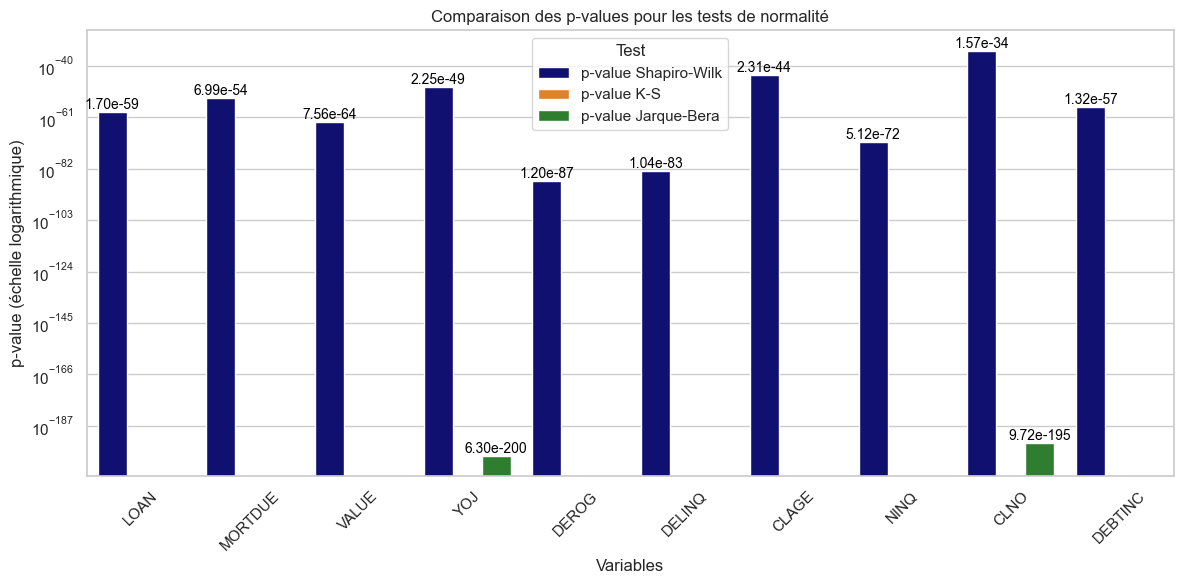

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

palette_colors = ["#000080", "#ff7f0e", "#228B22"]  

results = {
    'Variables': ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
    'p-value Shapiro-Wilk': [1.696736e-59, 6.993036e-54, 7.559306e-64, 2.253118e-49, 1.199307e-87, 1.041071e-83, 2.307855e-44, 5.119097e-72, 1.570316e-34, 1.319040e-57],
    'p-value K-S': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'p-value Jarque-Bera': [0.0, 0.0, 0.0, 6.302044e-200, 0.0, 0.0, 0.0, 0.0, 9.723754e-195, 0.0]  # Ajoute tes valeurs réelles ici
}

df_results = pd.DataFrame(results)

# on transforme le DataFrame pour un affichage en barplot
df_melted = df_results.melt(id_vars="Variables", var_name="Test", value_name="p-value")
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x="Variables", y="p-value", hue="Test", data=df_melted, palette=palette_colors)

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  
        plt.text(
            p.get_x() + p.get_width() / 2,  
            height,  
            f'{height:.2e}', 
            ha="center", va="bottom", fontsize=10, color="black"
        )
plt.title("Comparaison des p-values pour les tests de normalité")
plt.xlabel("Variables")
plt.ylabel("p-value (échelle logarithmique)")
plt.yscale('log')  # Utilisation d'une échelle logarithmique
plt.legend(title="Test")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Variable: MORTDUE
Borne inférieure: -21542.0, Borne supérieure: 159306.0
Number of outliers: 234

Variable: VALUE
Borne inférieure: -14547.625, Borne supérieure: 200447.375
Number of outliers: 320

Variable: YOJ
Borne inférieure: -12.0, Borne supérieure: 28.0
Number of outliers: 91

Variable: DEROG
Borne inférieure: 0.0, Borne supérieure: 0.0
Number of outliers: 725

Variable: DELINQ
Borne inférieure: 0.0, Borne supérieure: 0.0
Number of outliers: 1201

Variable: CLAGE
Borne inférieure: -59.551661634999974, Borne supérieure: 406.23064200499994
Number of outliers: 47

Variable: NINQ
Borne inférieure: -3.0, Borne supérieure: 5.0
Number of outliers: 177

Variable: CLNO
Borne inférieure: -1.5, Borne supérieure: 42.5
Number of outliers: 219

Variable: DEBTINC
Borne inférieure: 14.345367488000003, Borne supérieure: 53.79780451199999
Number of outliers: 94



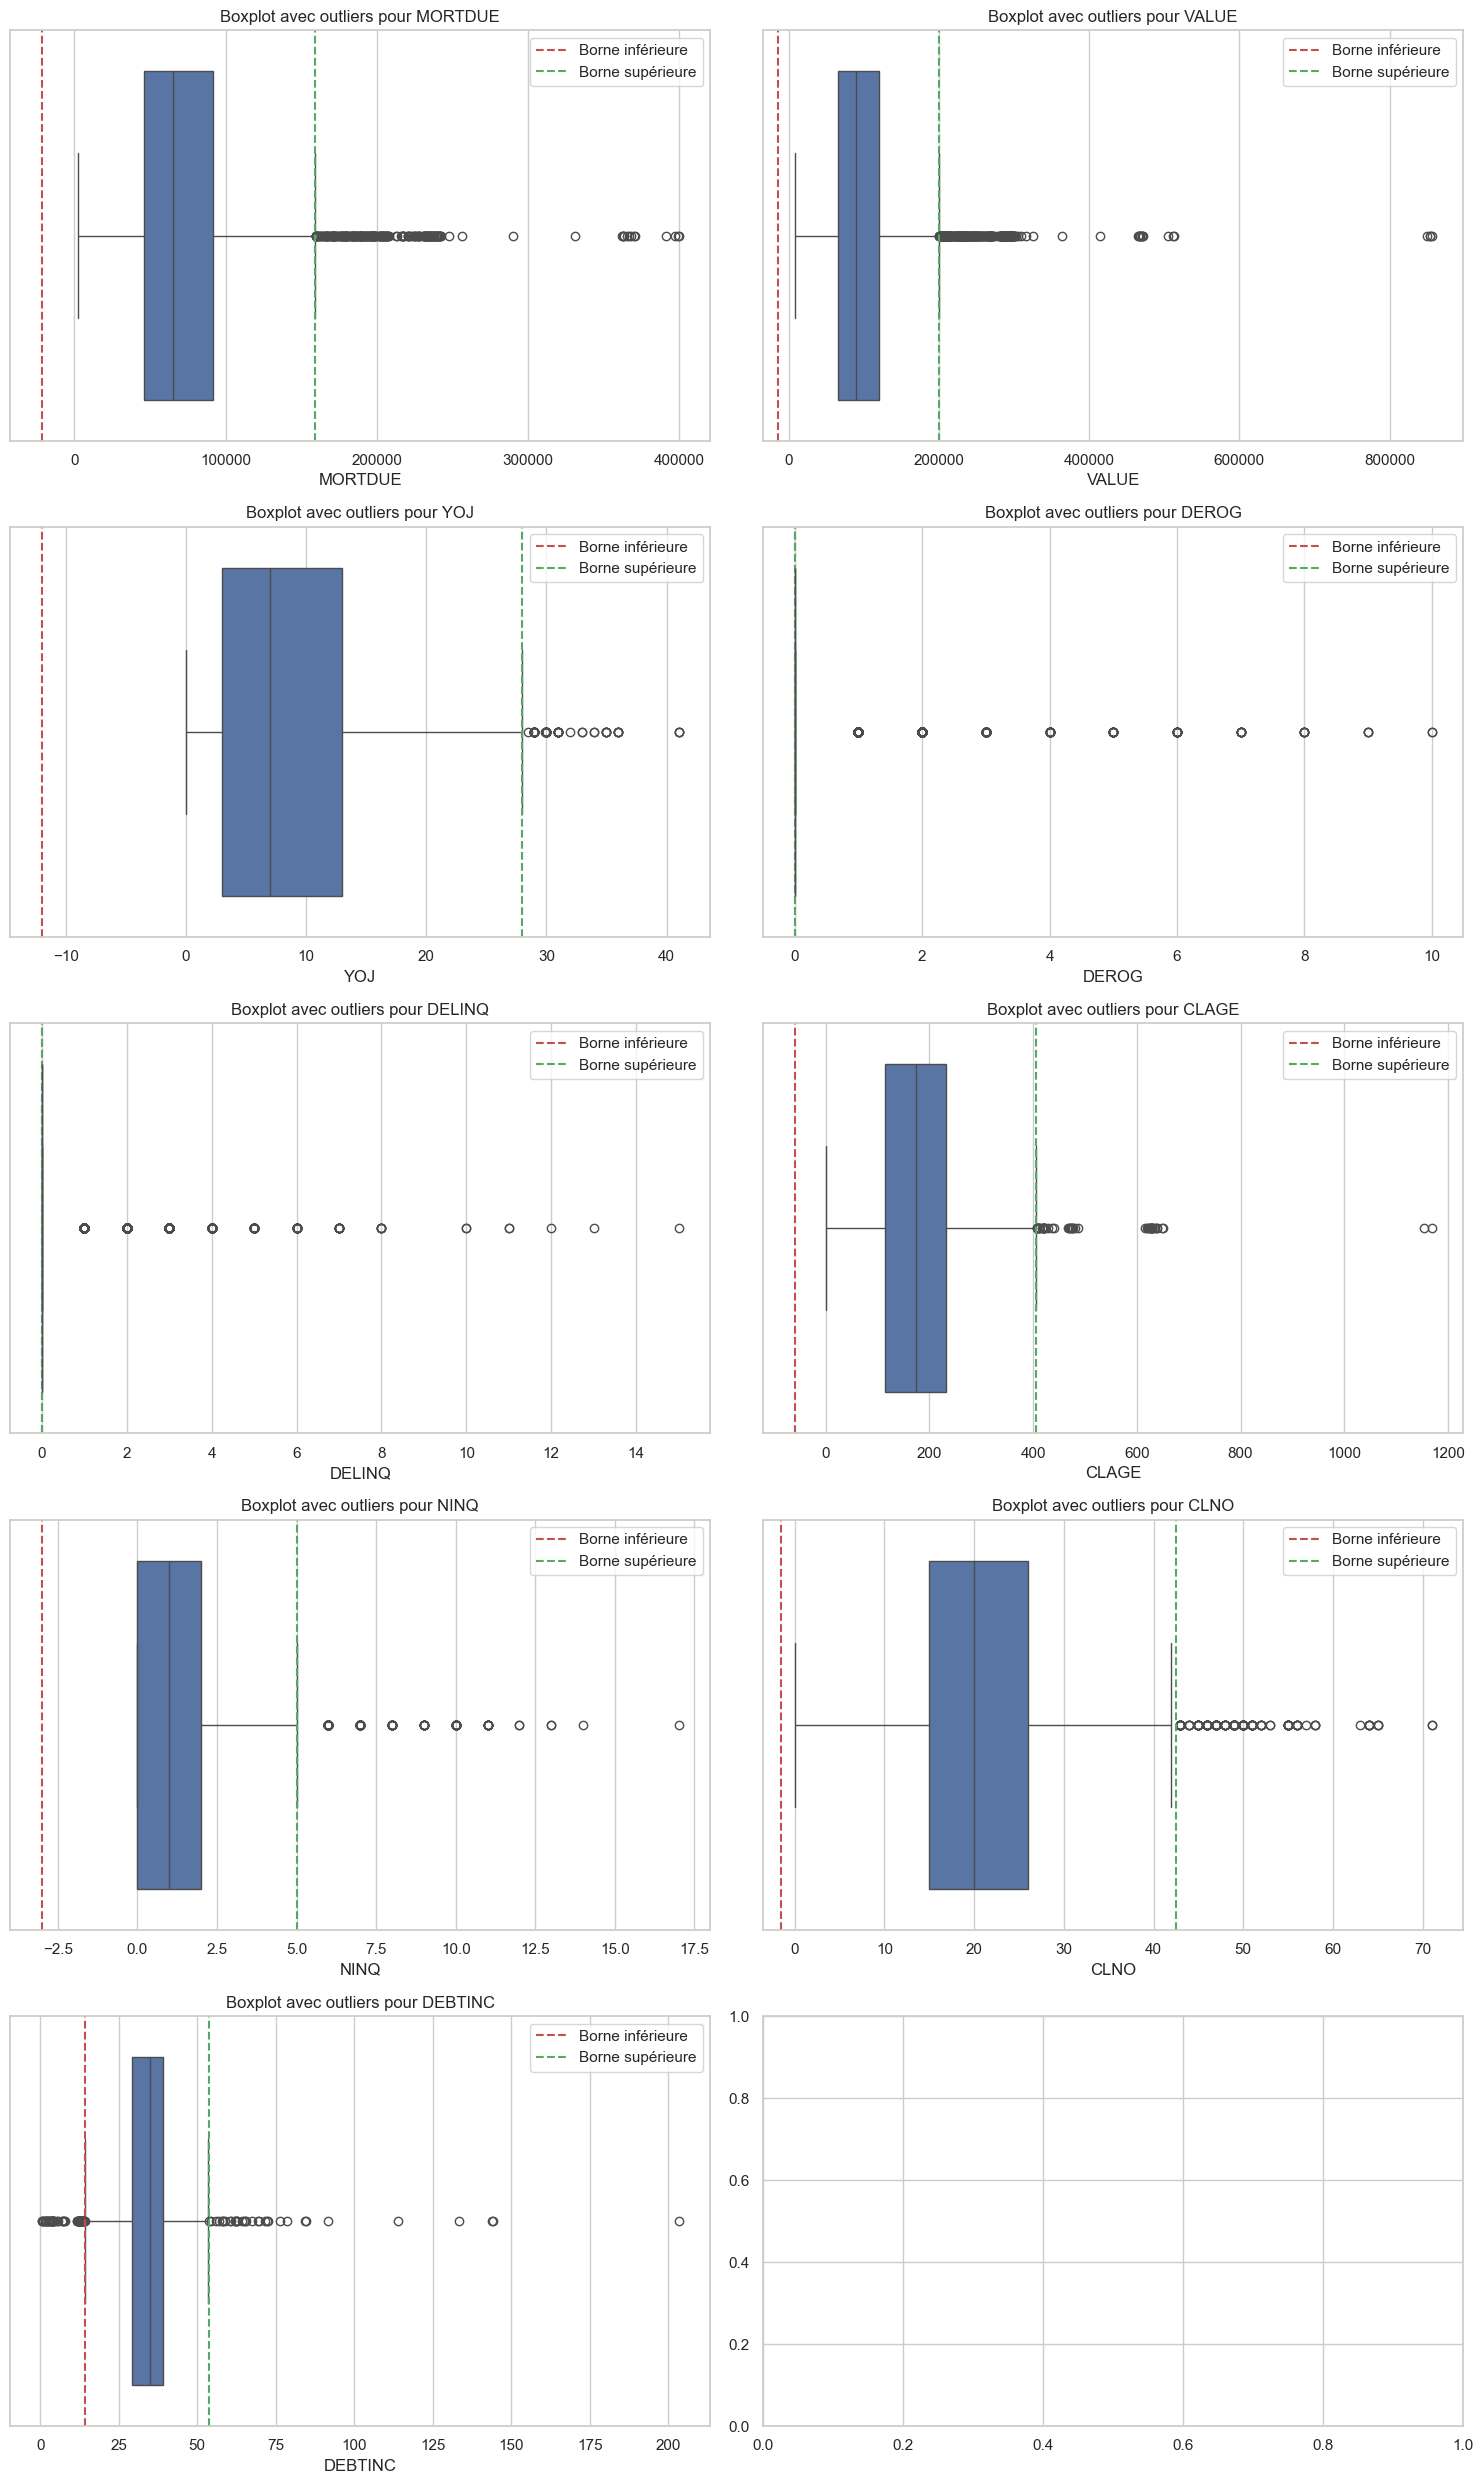

In [17]:
# Fonction pour détecter les outliers selon l'IQR et tracer les boxplots dans des subplots
def detect_and_plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns
    num_columns = len(numeric_columns)
    
    num_rows = int(np.ceil(num_columns / 2))  
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
    
    outliers_df = pd.DataFrame()

    for i, column in enumerate(numeric_columns):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        outlier_condition = (df[column] < borne_inf) | (df[column] > borne_sup)
        outliers_in_column = df.loc[outlier_condition, column]
        outliers_df[column] = pd.Series(outliers_in_column)

        row = i // 2
        col = i % 2
        sns.boxplot(ax=axes[row, col], x=df[column])
        axes[row, col].set_title(f'Boxplot avec outliers pour {column}')
        axes[row, col].axvline(x=borne_inf, color='r', linestyle='--', label='Borne inférieure')
        axes[row, col].axvline(x=borne_sup, color='g', linestyle='--', label='Borne supérieure')
        axes[row, col].legend()

        print(f'Variable: {column}')
        print(f'Borne inférieure: {borne_inf}, Borne supérieure: {borne_sup}')
        print(f'Number of outliers: {outlier_condition.sum()}')
        print('')
    
    plt.tight_layout() 
    plt.show()

    return outliers_df

outliers_detected = detect_and_plot_outliers(df_hmeq)

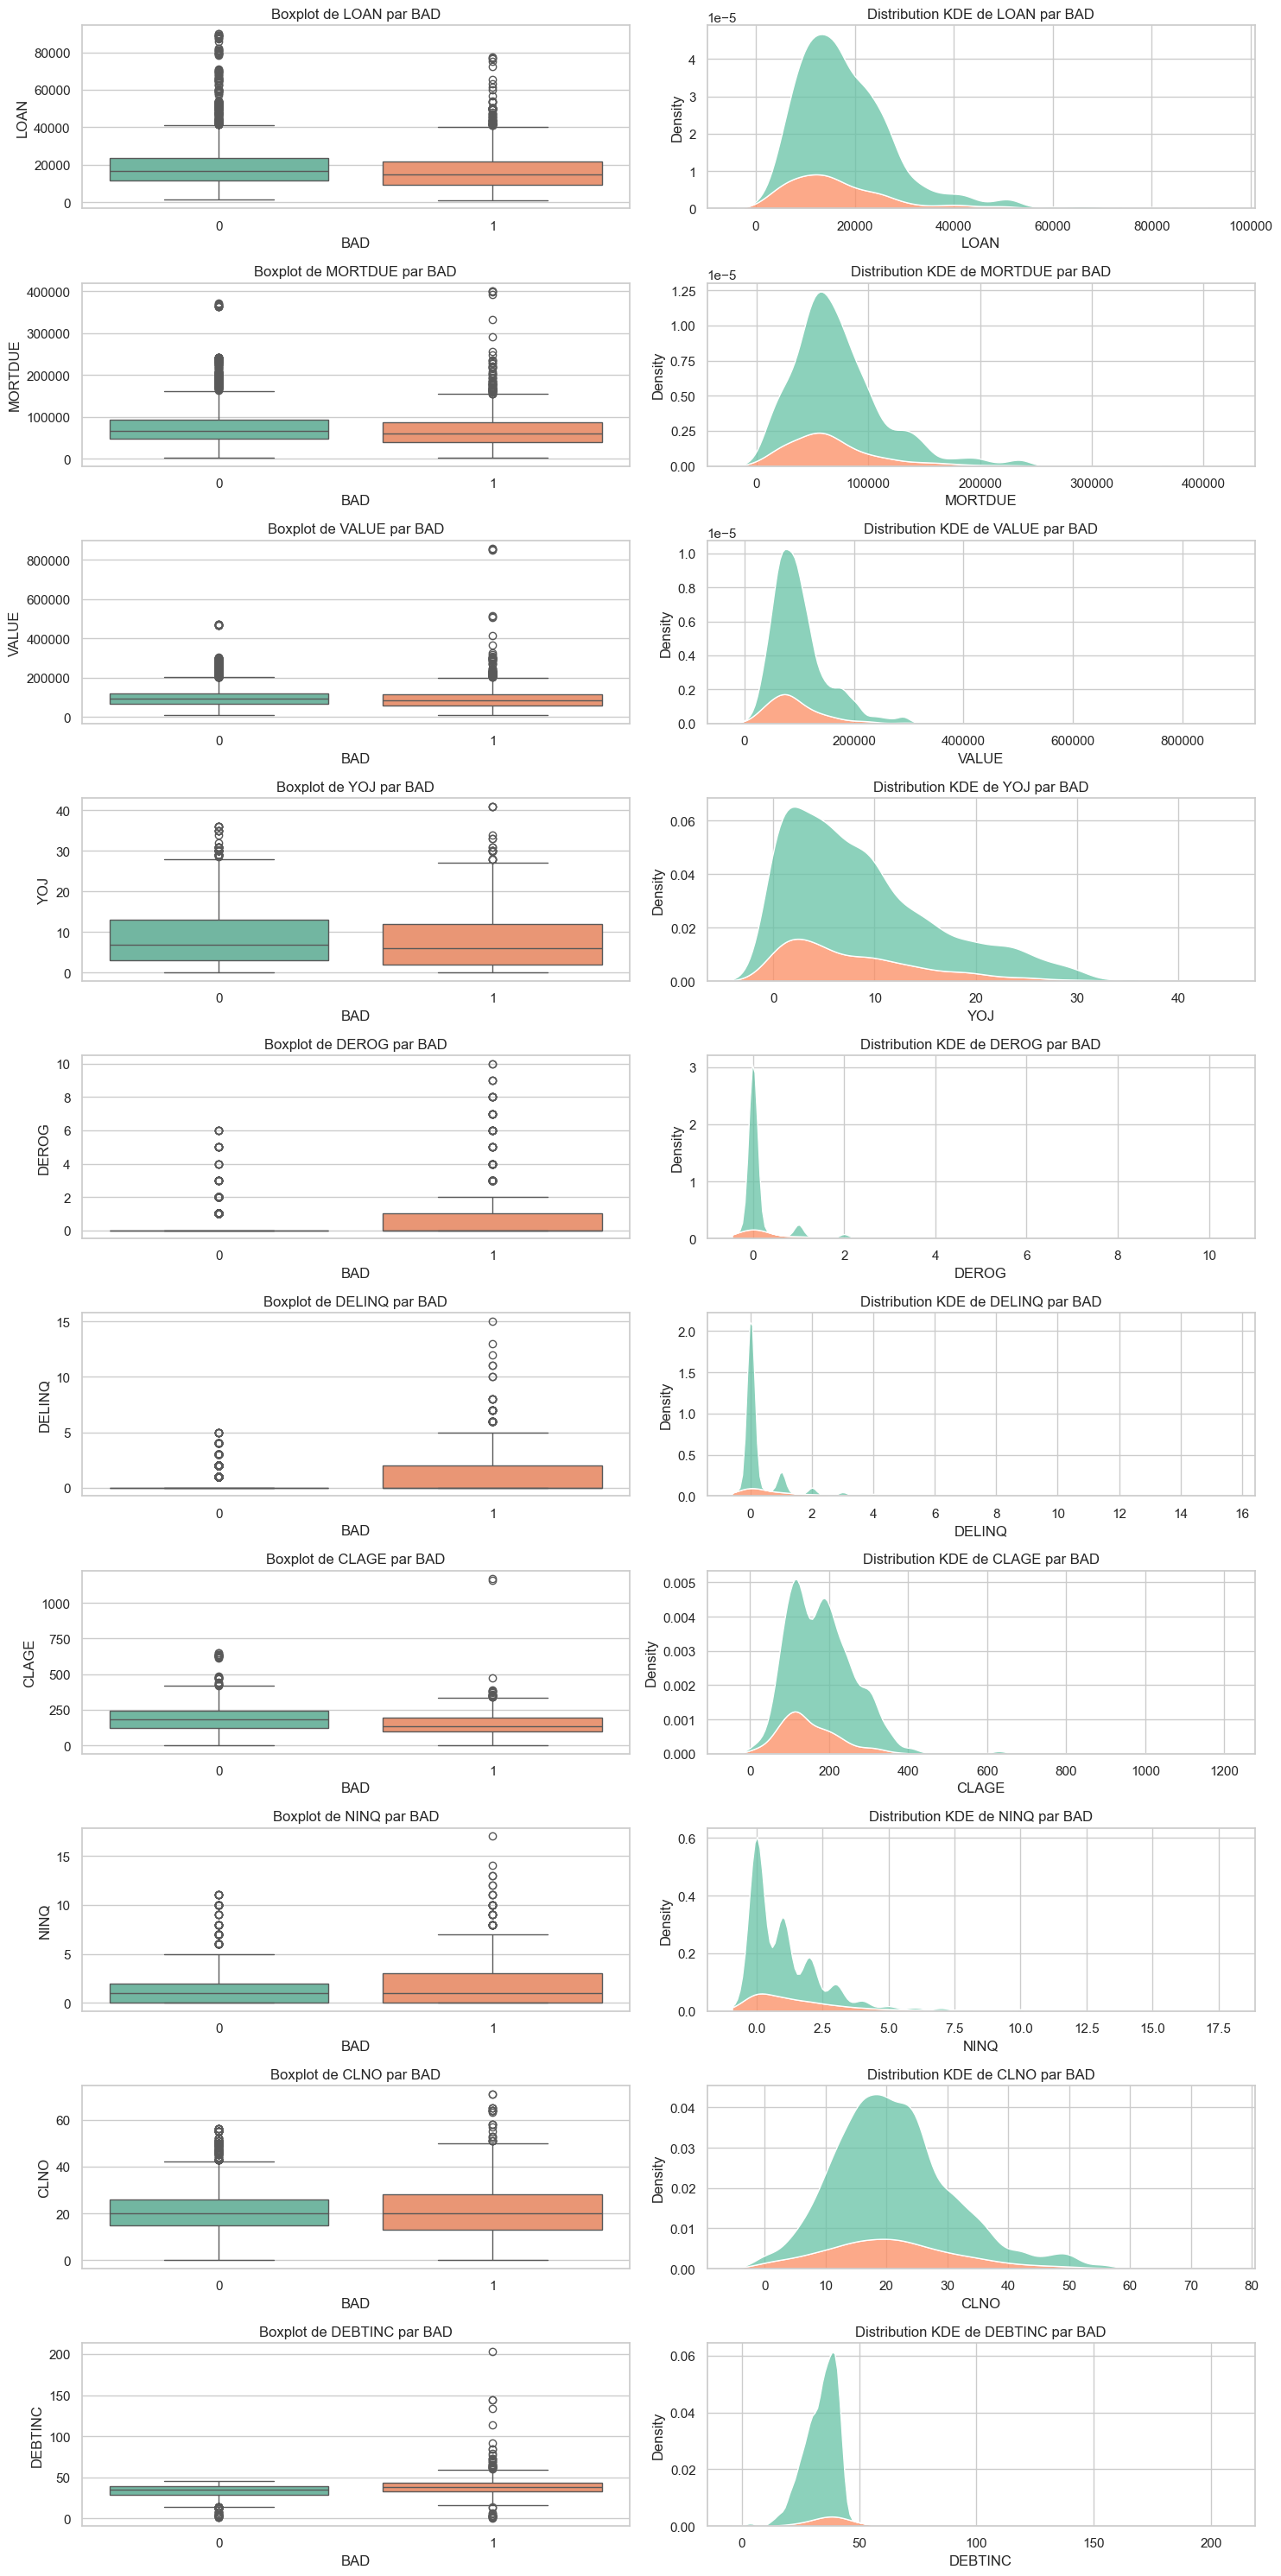

In [18]:
# Comparaison des distributions de chaque variable numérique selon BAD
fig, axes = plt.subplots(nrows=len(num_vars), ncols=2, figsize=(15, len(num_vars) * 3))

for i, var in enumerate(num_vars):
    # Boxplot par `BAD`
    sns.boxplot(data=df_hmeq, x='BAD', y=var, hue='BAD', palette='Set2', ax=axes[i, 0], legend=False)
    axes[i, 0].set_title(f'Boxplot de {var} par BAD')
    
    # KDE par `BAD`
    sns.kdeplot(data=df_hmeq, x=var, hue="BAD", multiple="stack", fill=True, ax=axes[i, 1], palette="Set2", legend=False)
    axes[i, 1].set_title(f'Distribution KDE de {var} par BAD')

plt.tight_layout()
plt.show()

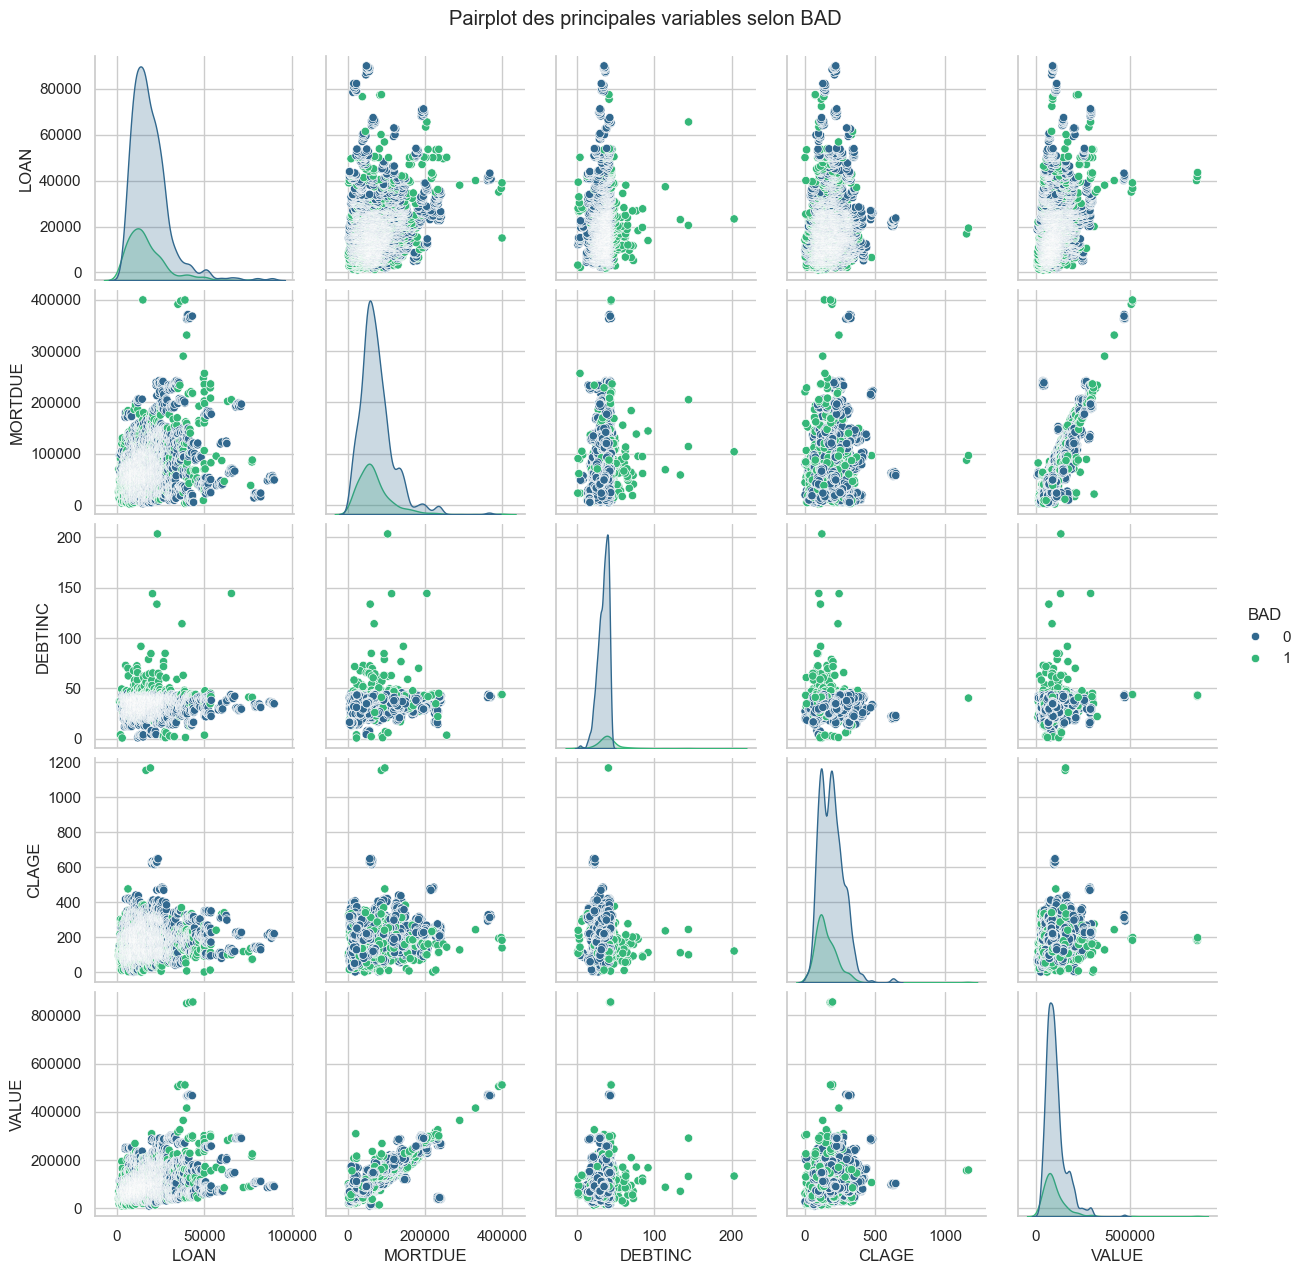

In [19]:
# Pairplot des principales variables selon BAD (nous en avons choisi juste quelques unes)
pairplot_vars = ['LOAN', 'MORTDUE', 'DEBTINC', 'CLAGE', 'VALUE', 'BAD']
sns.pairplot(df_hmeq[pairplot_vars], hue="BAD", palette="viridis")
plt.suptitle("Pairplot des principales variables selon BAD", y=1.02)
plt.show()

In [20]:
correlations = {}
for var in num_vars:
    # Aligner les deux vecteurs en supprimant les valeurs manquantes dans les deux séries
    aligned_data = df_hmeq[['BAD', var]].dropna()
    correlation, _ = pointbiserialr(aligned_data['BAD'], aligned_data[var])
    correlations[var] = correlation

correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Corrélation avec BAD'])
correlations_df = correlations_df.sort_values(by='Corrélation avec BAD', ascending=False)
print(correlations_df)

         Corrélation avec BAD
DELINQ               0.354107
DEROG                0.276081
DEBTINC              0.199835
NINQ                 0.174980
CLNO                -0.004157
VALUE               -0.029954
MORTDUE             -0.048219
YOJ                 -0.060238
LOAN                -0.075099
CLAGE               -0.170499


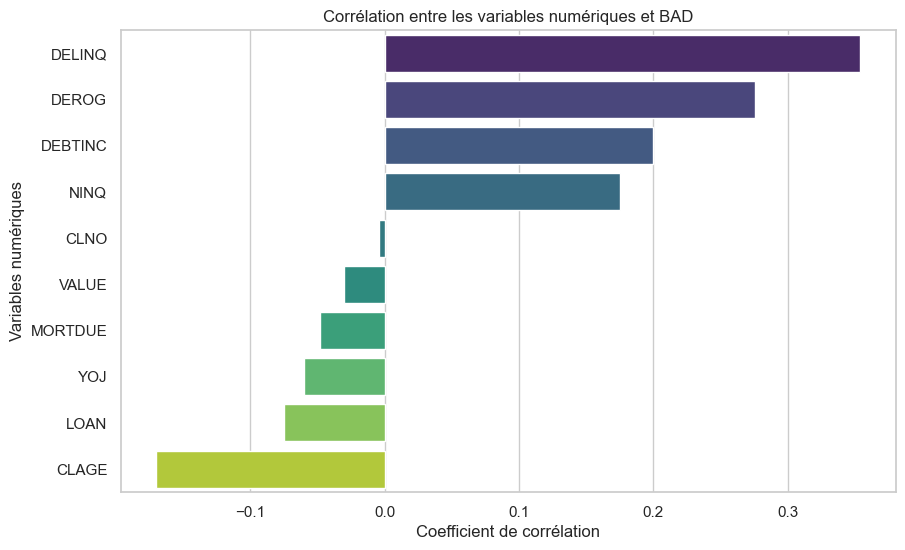

In [21]:
# on créé un barplot des corrélations entre les variables numériques et BAD (en retirant temporairement les valeurs manquantes)
plt.figure(figsize=(10, 6))
sns.barplot(x='Corrélation avec BAD', y=correlations_df.index, data=correlations_df, hue=correlations_df.index, palette='viridis', legend=False)
plt.title("Corrélation entre les variables numériques et BAD")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables numériques")
plt.show()

In [22]:
cat_vars_analyse_chi_2 = ['REASON', 'JOB']
chi2_results = {}

for cat in cat_vars_analyse_chi_2:
    contingency_table = pd.crosstab(df_hmeq[cat], df_hmeq['BAD'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[cat] = {'Chi2': chi2, 'p-value': p}

chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
print(chi2_df)

             Chi2       p-value
REASON   8.039751  4.576182e-03
JOB     81.932490  3.306676e-16


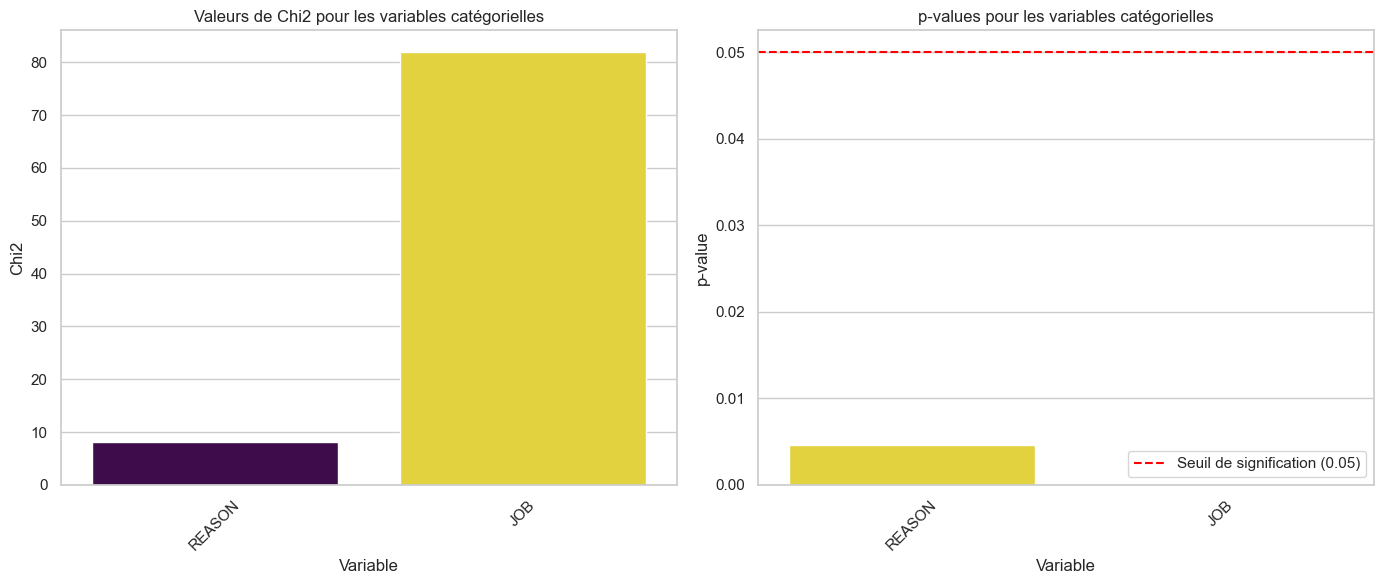

In [23]:
# on créé une figure avec deux barplots côte à côte pour afficher les valeurs de Chi2 et les p-values
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Barplot pour les valeurs de Chi2
sns.barplot(x=chi2_df.index, y='Chi2', data=chi2_df, hue='Chi2', palette='viridis', ax=ax[0], legend=False)
ax[0].set_title("Valeurs de Chi2 pour les variables catégorielles")
ax[0].set_xlabel("Variable")
ax[0].set_ylabel("Chi2")
ax[0].tick_params(axis='x', rotation=45)

# Barplot pour les p-values
sns.barplot(x=chi2_df.index, y='p-value', data=chi2_df, hue='p-value', palette='viridis', ax=ax[1], legend=False)
ax[1].axhline(0.05, color='red', linestyle='--', label='Seuil de signification (0.05)')
ax[1].set_title("p-values pour les variables catégorielles")
ax[1].set_xlabel("Variable")
ax[1].set_ylabel("p-value")
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

plt.tight_layout()
plt.show()

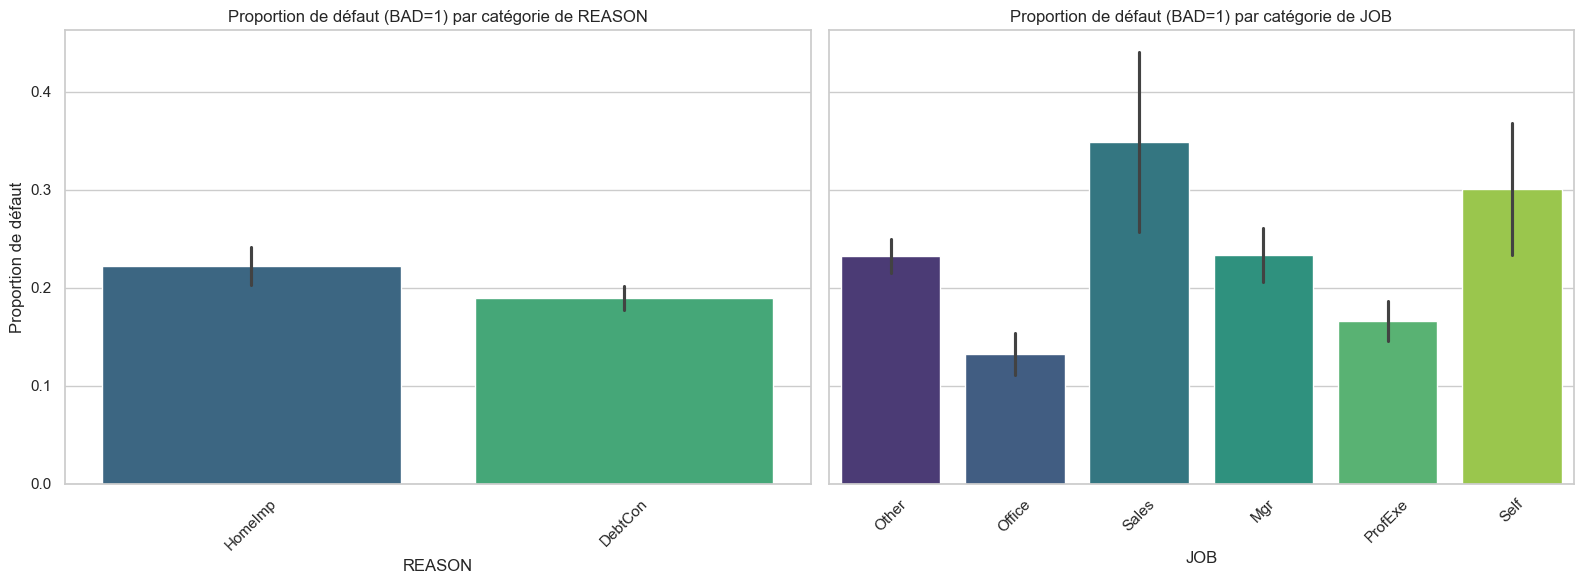

In [24]:
# Création d'un subplot avec deux graphiques pour visualiser la proportion de défaut par catégories de "REASON" et "JOB"
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

cat_vars_analysis = ['REASON', 'JOB']
for i, var in enumerate(cat_vars_analysis):
    sns.barplot(x=var, y='BAD', data=df_hmeq, estimator=lambda x: sum(x) / len(x), hue=var, dodge=False, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Proportion de défaut (BAD=1) par catégorie de {var}')
    axes[i].set_ylabel('Proportion de défaut')
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend([],[], frameon=False)  
plt.tight_layout()
plt.show()

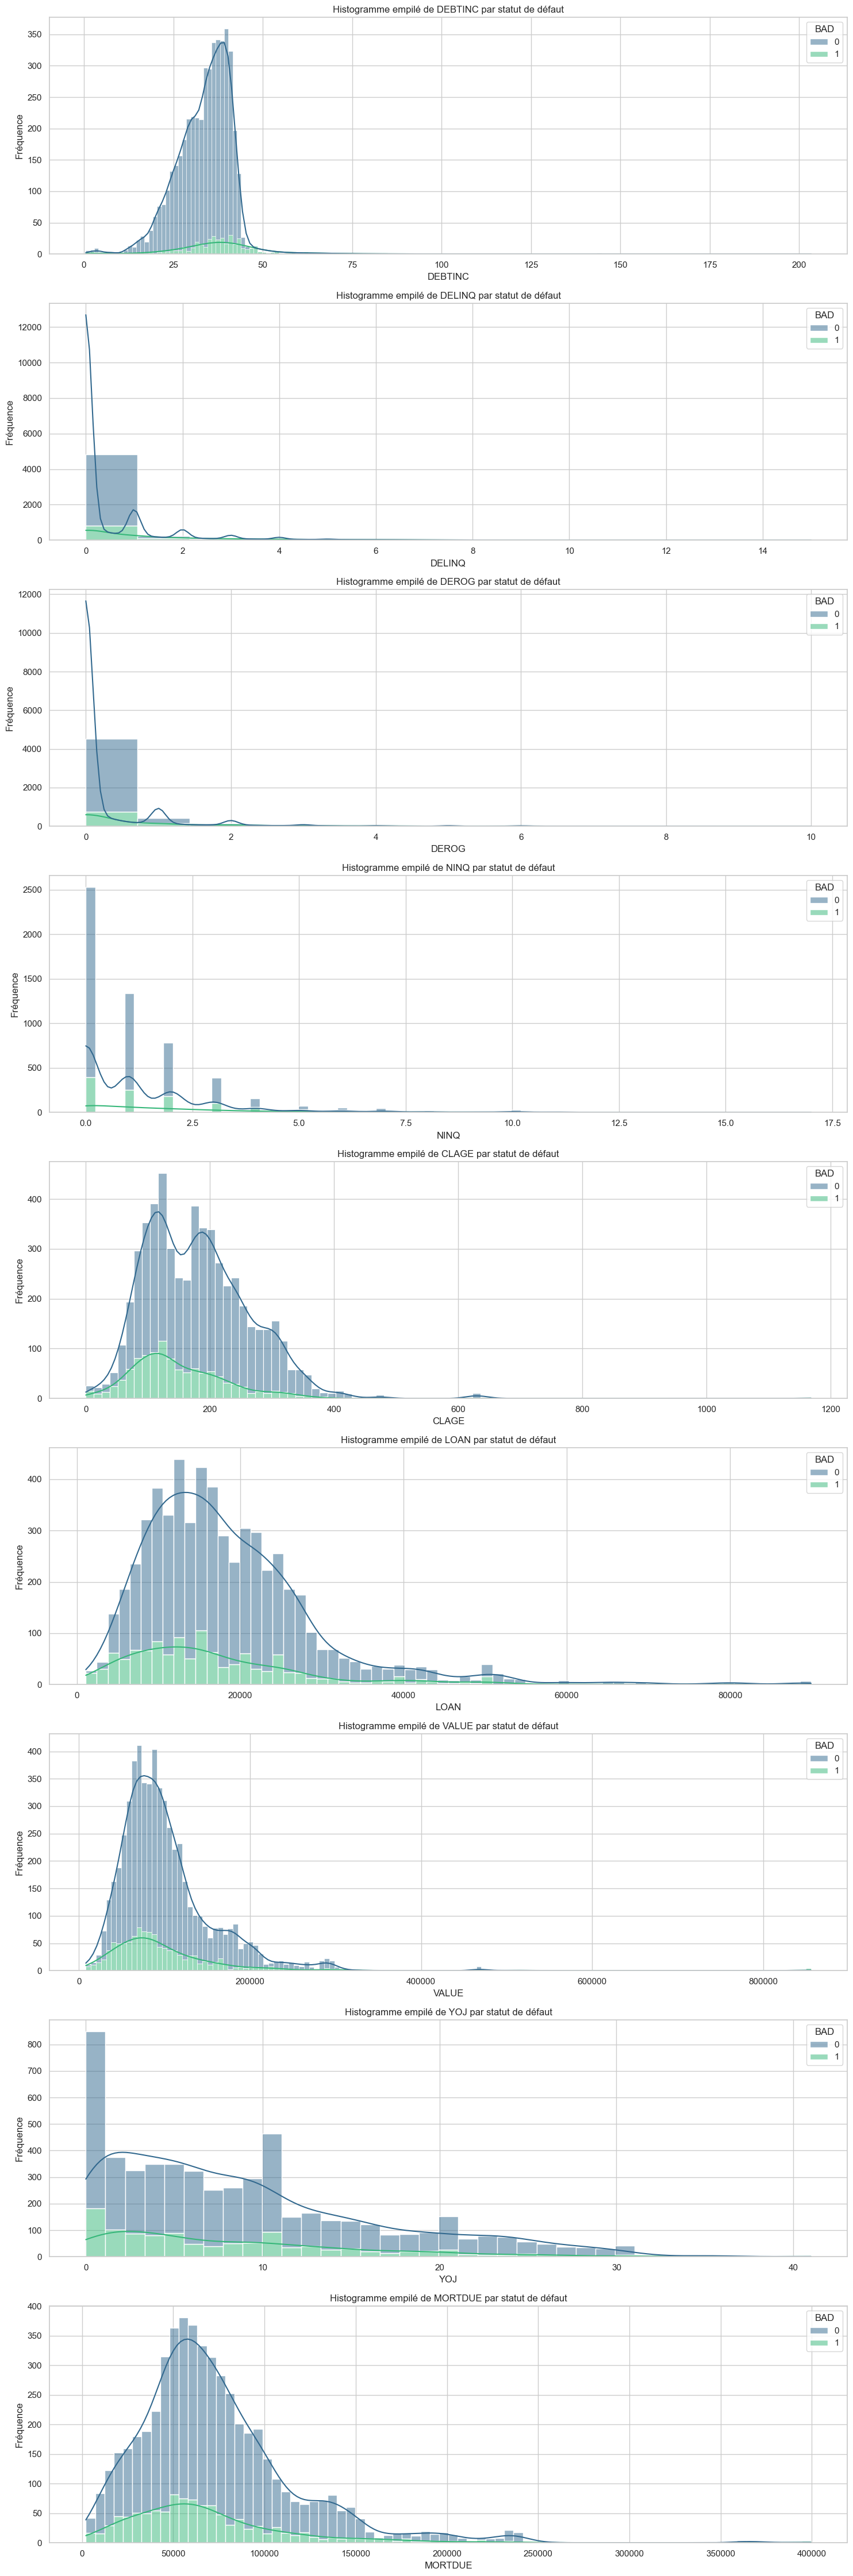

In [25]:
# Histogrammes empilés pour quelques variables continues en fonction de BAD
hist_emp_vars = ['DEBTINC', 'DELINQ', 'DEROG', 'NINQ', 'CLAGE', 'LOAN', 'VALUE', 'YOJ', 'MORTDUE']
plt.figure(figsize=(15, 5 * len(hist_emp_vars)))

for i, var in enumerate(hist_emp_vars, 1):
    plt.subplot(len(hist_emp_vars), 1, i)
    sns.histplot(data=df_hmeq, x=var, hue='BAD', multiple="stack", palette="viridis", kde=True)
    plt.title(f'Histogramme empilé de {var} par statut de défaut')
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

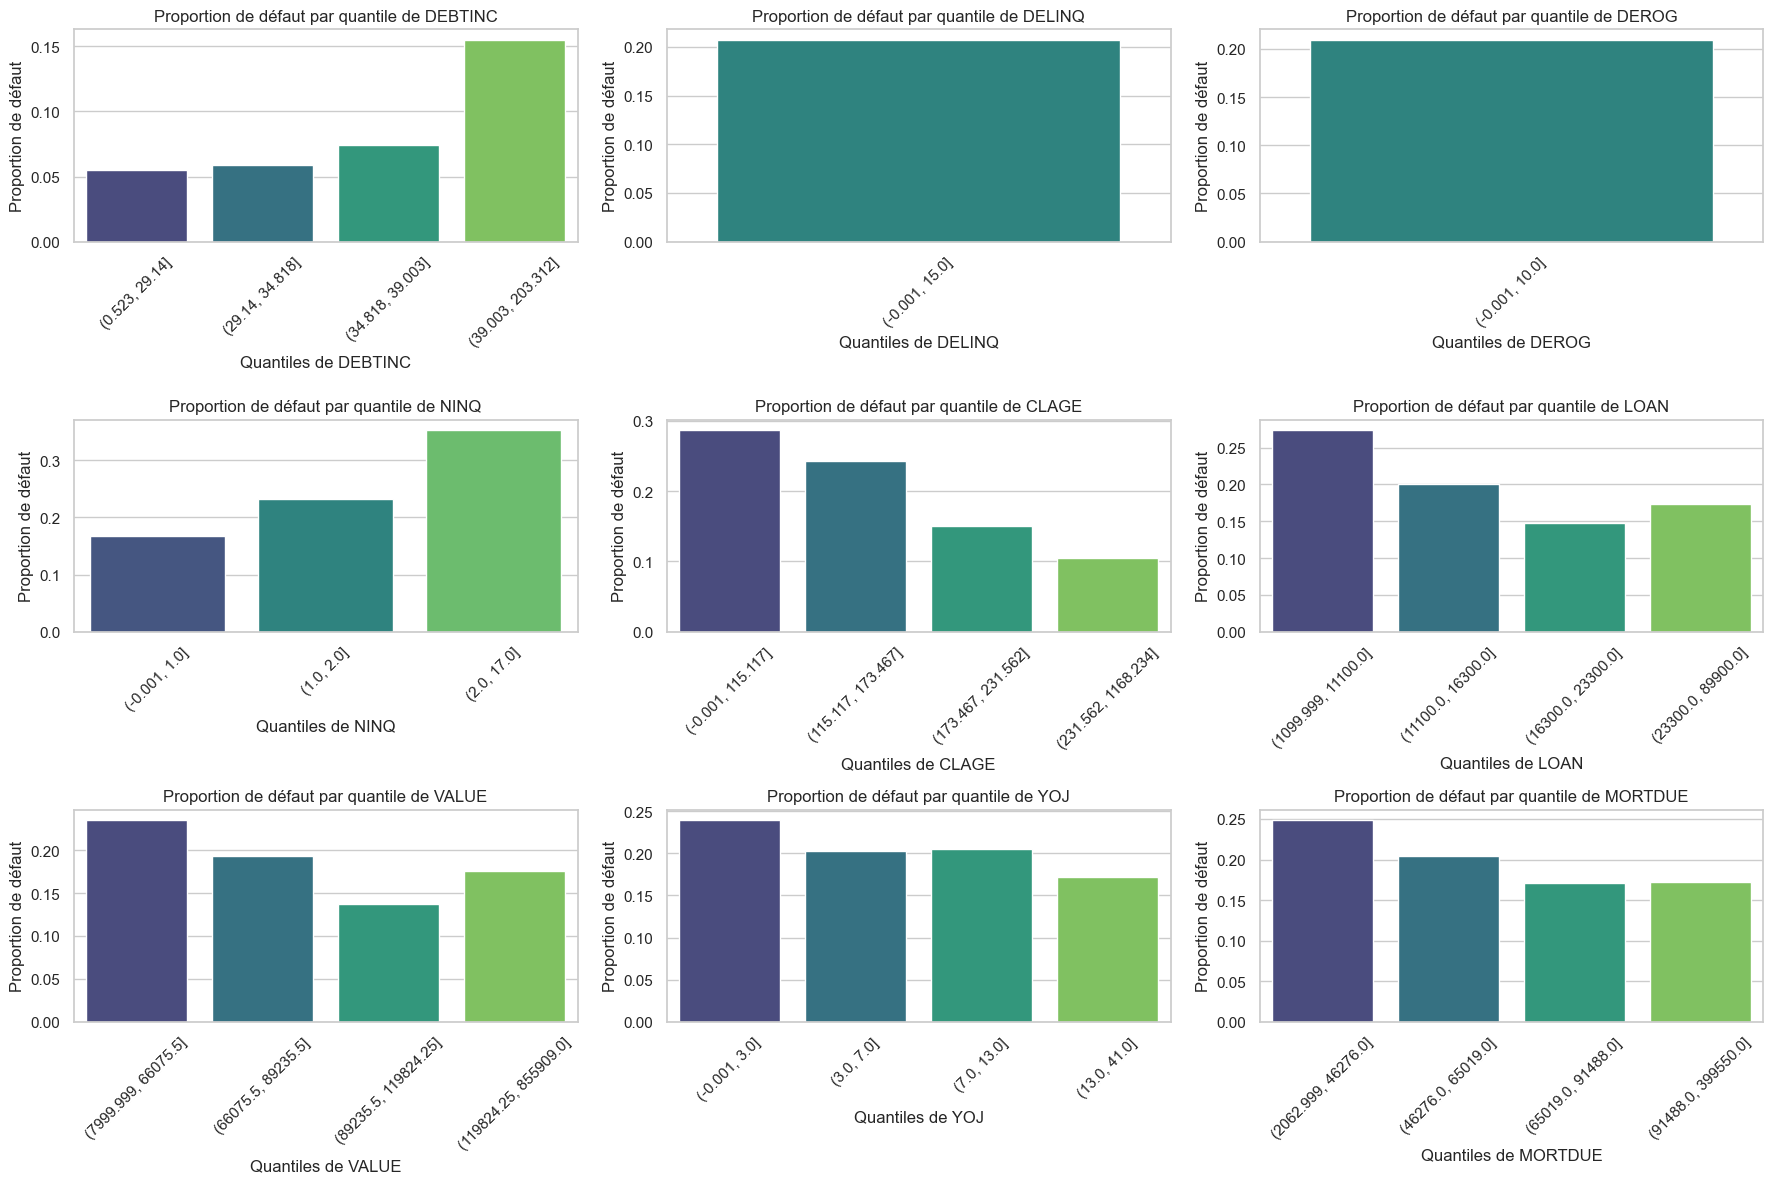

In [26]:
# on calcule des quantiles et des proportions de défaut par quantile
var_qtd = ['DEBTINC', 'DELINQ', 'DEROG', 'NINQ', 'CLAGE', 'LOAN', 'VALUE', 'YOJ', 'MORTDUE']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))  
axes = axes.flatten()  

for i, variable in enumerate(var_qtd):
    df_hmeq['quantile'] = pd.qcut(df_hmeq[variable], q=4, duplicates='drop')
    
    quantile_default = df_hmeq.groupby('quantile', observed=False)['BAD'].mean()

    sns.barplot(x=quantile_default.index.astype(str), y=quantile_default.values, palette="viridis", ax=axes[i], hue=quantile_default.index.astype(str), legend=False)
    axes[i].set_title(f'Proportion de défaut par quantile de {variable}')
    axes[i].set_xlabel(f'Quantiles de {variable}')
    axes[i].set_ylabel('Proportion de défaut')
    axes[i].tick_params(axis='x', rotation=45)

    df_hmeq.drop(columns='quantile', inplace=True)

plt.tight_layout()
plt.show()

 <strong style="color: blue; font-size: 24px;">REGROUPEMENT DES CATEGORIES DE LA VARIABLE JOB</strong>

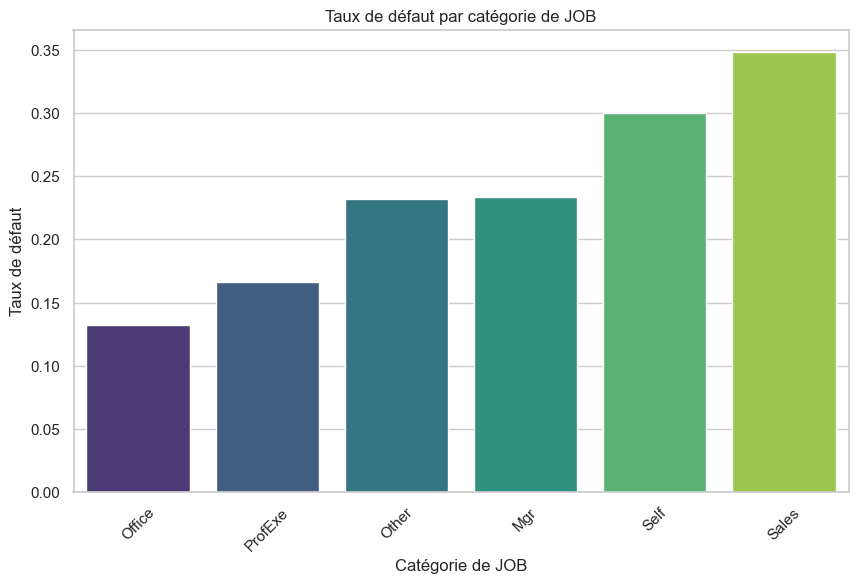

In [27]:
# Calcul du taux de défaut moyen pour chaque catégorie de la variable 'JOB'
default_rates = df_hmeq.groupby('JOB')['BAD'].mean().sort_values()

# Création d'un graphique en barres pour afficher le taux de défaut par catégorie de JOB
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates.index, y=default_rates.values, hue=default_rates.index, palette='viridis', legend=False)
plt.title('Taux de défaut par catégorie de JOB')
plt.ylabel('Taux de défaut')
plt.xlabel('Catégorie de JOB')
plt.xticks(rotation=45)
plt.show()

In [28]:
# on regroupe les catégories de la variable 'JOB' en trois catégories plus larges et on ajoute le résultat dans une nouvelle colonne 'JOB_GROUP'
def map_job_categories(job):
    if job in ['Office', 'ProfExe']:
        return 'Office and Professional'
    elif job in ['Other', 'Mgr']:
        return 'Management and other'
    elif job in ['Self', 'Sales']:
        return 'Self-Employed and Sales'
    return np.nan  

df_hmeq['JOB_GROUP'] = df_hmeq['JOB'].map(map_job_categories)

print(df_hmeq[['JOB', 'JOB_GROUP']].head())

      JOB                JOB_GROUP
0   Other     Management and other
1   Other     Management and other
2   Other     Management and other
3     NaN                      NaN
4  Office  Office and Professional


In [29]:
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_GROUP
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,Management and other
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,Management and other
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,Management and other
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,Office and Professional


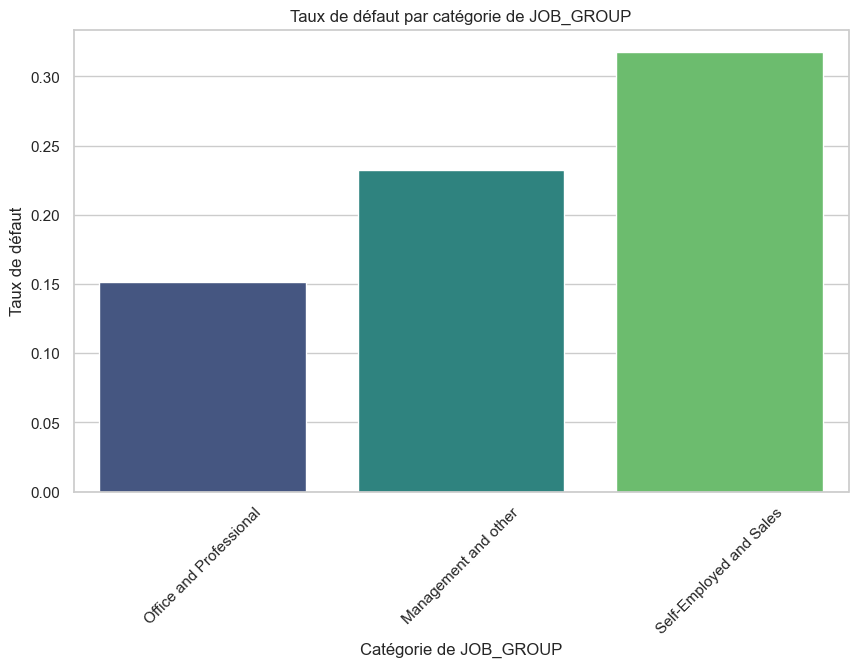

In [30]:
default_rates_mapping = df_hmeq.groupby('JOB_GROUP')['BAD'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates_mapping.index, y=default_rates_mapping.values, hue=default_rates_mapping.index, palette='viridis', legend=False)
plt.title('Taux de défaut par catégorie de JOB_GROUP')
plt.ylabel('Taux de défaut')
plt.xlabel('Catégorie de JOB_GROUP')
plt.xticks(rotation=45)
plt.show()

<strong style="color: blue; font-size: 24px;">GESTION DES VALEURS MANQUANTES</strong>

In [31]:
X = df_hmeq.drop(['JOB'], axis=1)  # Supprime 'BAD' et 'JOB' avant le split
y = df_hmeq['BAD']

# Split en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# on copie des df pour des manipulations ultérieures
hmeq_train = X_train.copy()
hmeq_test = X_test.copy()

bad_train = hmeq_train['BAD']
bad_test = hmeq_test['BAD']

hmeq_train = hmeq_train.drop(['BAD'], axis=1)
hmeq_test = hmeq_test.drop(['BAD'], axis=1)

In [32]:
# on crée avant le traitement des valeurs manquantes une colonne binaire qui indique 1 s'il y'a présence de valeur manquante pour DEBTINC ou 0 si non
hmeq_train['DEBTINC_missing'] = hmeq_train['DEBTINC'].isnull().astype(int)
hmeq_test['DEBTINC_missing'] = hmeq_test['DEBTINC'].isnull().astype(int)

In [33]:
# imputation par le mode pour les variables catégorielles (train et test)
mode_impute_cols = ['REASON', 'JOB_GROUP']
for col in mode_impute_cols:
    hmeq_train[col] = hmeq_train[col].fillna(hmeq_train[col].mode()[0])  
    hmeq_test[col] = hmeq_test[col].fillna(hmeq_train[col].mode()[0])    # on utilise le mode du train pour le test

# on utilise la médiane pour quelques variables continues
median_impute_cols = ['DEBTINC', 'MORTDUE', 'VALUE']
hmeq_train[median_impute_cols] = hmeq_train[median_impute_cols].fillna(hmeq_train[median_impute_cols].median())
hmeq_test[median_impute_cols] = hmeq_test[median_impute_cols].fillna(hmeq_train[median_impute_cols].median())  # on applique la médiane du train sur le test

# puis on applique MICE sur les autres variables
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
mice_impute_cols = ['DEROG', 'DELINQ', 'YOJ', 'CLAGE', 'NINQ', 'CLNO']
hmeq_train[mice_impute_cols] = mice_imputer.fit_transform(hmeq_train[mice_impute_cols])
hmeq_test[mice_impute_cols] = mice_imputer.transform(hmeq_test[mice_impute_cols])  # on applique le modèle du train sur les données de test

print("Valeurs manquantes après imputation (train) :\n", hmeq_train.isnull().sum())
print("Valeurs manquantes après imputation (test) :\n", hmeq_test.isnull().sum())

Valeurs manquantes après imputation (train) :
 LOAN               0
MORTDUE            0
VALUE              0
REASON             0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
JOB_GROUP          0
DEBTINC_missing    0
dtype: int64
Valeurs manquantes après imputation (test) :
 LOAN               0
MORTDUE            0
VALUE              0
REASON             0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
JOB_GROUP          0
DEBTINC_missing    0
dtype: int64


<strong style="color: blue; font-size: 24px;">ENCODAGE DES VARIABLES CATEGORIELLES</strong> 

In [34]:
# Encodage de 'JOB' et 'REASON' après toutes nos imputations
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
hmeq_train_encoded = pd.DataFrame(encoder.fit_transform(hmeq_train[['JOB_GROUP', 'REASON']]),
                                  columns=encoder.get_feature_names_out(['JOB_GROUP', 'REASON']),
                                  index=hmeq_train.index)
hmeq_test_encoded = pd.DataFrame(encoder.transform(hmeq_test[['JOB_GROUP', 'REASON']]),
                                 columns=encoder.get_feature_names_out(['JOB_GROUP', 'REASON']),
                                 index=hmeq_test.index)

hmeq_train = hmeq_train.drop(['JOB_GROUP', 'REASON'], axis=1).join(hmeq_train_encoded)
hmeq_test = hmeq_test.drop(['JOB_GROUP', 'REASON'], axis=1).join(hmeq_test_encoded)

print("Dimensions du set d'entraînement après encodage :", hmeq_train.shape)
print("Dimensions du set de test après encodage :", hmeq_test.shape)

Dimensions du set d'entraînement après encodage : (4768, 14)
Dimensions du set de test après encodage : (1192, 14)


<strong style="color: blue; font-size: 24px;">FEATURE ENGINEERING</strong> 

In [35]:
hmeq_train['LOAN_VALUE_ratio'] = hmeq_train['LOAN'] / (hmeq_train['VALUE'] + 1e-6)
hmeq_test['LOAN_VALUE_ratio'] = hmeq_test['LOAN'] / (hmeq_test['VALUE'] + 1e-6)

hmeq_train = hmeq_train.drop(['VALUE', 'LOAN'], axis=1)
hmeq_test = hmeq_test.drop(['VALUE', 'LOAN'], axis=1)

<strong style="color: blue; font-size: 24px;">VERIFICATION DE L HYPOTHESE DE LINEARITE ENTRE LOG-ODDS DE LA VARIABLE CIBLE ET LES VARIABLES EXPLICATIVES</strong> 

In [36]:
# on implémente le test de Box Tidwell
variables_continues_odds = ['LOAN_VALUE_ratio', 'MORTDUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
hmeq_train_copy = hmeq_train.copy()

# on ajoute les interactions log-transformées pour les variables continues
for var in variables_continues_odds:
    hmeq_train_copy[f'log_{var}'] = hmeq_train_copy[var] * np.log(hmeq_train_copy[var] + 1e-5)

# on choisit les variables et les interactions pour le modèle
hmeq_train_copy = hmeq_train_copy[variables_continues_odds + [f'log_{var}' for var in variables_continues_odds]]
hmeq_train_copy['BAD'] = bad_train  # on ajoute la variable cible

# il s'agit de la pour le modèle logit avec les termes d'interaction de Box-Tidwell
formule = 'BAD ~ ' + ' + '.join(variables_continues_odds + [f'log_{var}' for var in variables_continues_odds])
logit_model = logit(formule, data=hmeq_train_copy).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.382474
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4766
Model:                          Logit   Df Residuals:                     4747
Method:                           MLE   Df Model:                           18
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.2347
Time:                        12:28:16   Log-Likelihood:                -1822.9
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                4.101e-226
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1689      0.726      5.745      0.000       2.747       5.591

c:\Users\dumas\Desktop\MOSEF\Scoring\Projet\.venv\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


A l'issue du test de Box_Tidwell, uniquement YOJ, DEROG, DELINQ et NINQ respecte l'hypothèse car les p-values associées à leur log sont supérieures à 0.05 donc non significatives. Nous avons donc décidé de discrétiser les autres variables qui ne la respectent pas

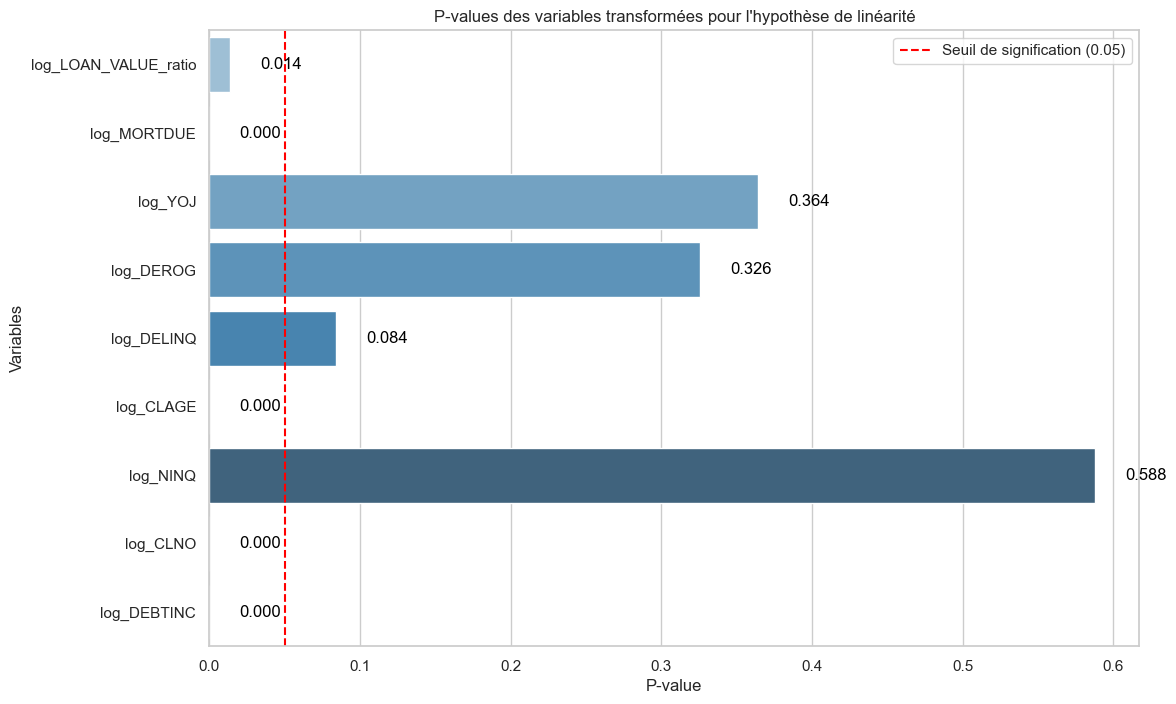

In [37]:
# on crée juste un bar-plot à l'aide des p-values
p_values_data = {
    'Variable': ['log_LOAN_VALUE_ratio', 'log_MORTDUE', 'log_YOJ', 'log_DEROG', 'log_DELINQ', 'log_CLAGE', 'log_NINQ', 'log_CLNO', 'log_DEBTINC'],
    'P-value': [0.014, 0.000, 0.364, 0.326, 0.084, 0.000, 0.588, 0.000, 0.000]
}
p_values_df = pd.DataFrame(p_values_data)
significance_level = 0.05

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(data=p_values_df, y='Variable', x='P-value', palette="Blues_d", hue='Variable', dodge=False, legend=False)
plt.axvline(x=significance_level, color='red', linestyle='--', label=f'Seuil de signification ({significance_level})')
for index, row in p_values_df.iterrows():
    plt.text(row['P-value'] + 0.02, index, f"{row['P-value']:.3f}", color='black', va="center")

plt.xlabel('P-value')
plt.ylabel('Variables')
plt.title("P-values des variables transformées pour l'hypothèse de linéarité")
plt.legend()
plt.show()

<strong style="color: blue; font-size: 24px;">DISCRETISATION DES VARIABLES VIOLANT L HYPOTHESE DE LINEARITE</strong> 

In [38]:
variables_a_discretiser = ['LOAN_VALUE_ratio', 'MORTDUE', 'CLAGE', 'CLNO', 'DEBTINC']

# on crée un dictionnaire pour stocker les objets OptimalBinning que nous aurons ajustés sur le train
optb_dict = {}
for var in variables_a_discretiser:
    optb = OptimalBinning(name=var, dtype="numerical", solver="cp")
    optb.fit(hmeq_train[var], bad_train)
    optb_dict[var] = optb
    hmeq_train[f'{var}_discretise'] = optb.transform(hmeq_train[var])

hmeq_train.drop(columns=variables_a_discretiser, inplace=True)

print("Variables discrétisées dans hmeq_train :")
print(hmeq_train[[f'{var}_discretise' for var in variables_a_discretiser]].head())

# on applique les mêmes transformations sur hmeq_test
for var in variables_a_discretiser:
    hmeq_test[f'{var}_discretise'] = optb_dict[var].transform(hmeq_test[var])

hmeq_test.drop(columns=variables_a_discretiser, inplace=True)

print("\nVariables discrétisées dans hmeq_test :")
print(hmeq_test[[f'{var}_discretise' for var in variables_a_discretiser]].head())

Variables discrétisées dans hmeq_train :
      LOAN_VALUE_ratio_discretise  MORTDUE_discretise  CLAGE_discretise  \
609                      0.015637            0.171792         -0.312666   
4015                     0.053135           -0.005818         -1.057173   
1591                     0.033818            0.012589         -0.126644   
1127                     0.033818            0.012589         -0.312666   
920                      0.015637           -0.005818          0.275302   

      CLNO_discretise  DEBTINC_discretise  
609         -0.069661            1.304614  
4015         0.046599            1.304614  
1591        -0.194101            2.071211  
1127         0.046599           -0.459889  
920          0.046599           -0.459889  

Variables discrétisées dans hmeq_test :
      LOAN_VALUE_ratio_discretise  MORTDUE_discretise  CLAGE_discretise  \
4798                     0.053135           -0.372509          0.275302   
3716                     0.053135           -0.372509

In [39]:
binning_table = optb.binning_table.build()
print(binning_table)

                   Bin  Count  Count (%)  Non-event  Event  Event rate  \
0        (-inf, 23.48)    343   0.071938        312     31    0.090379   
1       [23.48, 27.75)    415   0.087039        395     20    0.048193   
2       [27.75, 30.78)    427   0.089555        414     13    0.030445   
3       [30.78, 34.79)    695   0.145763        651     44    0.063309   
4       [34.79, 42.32)   2647   0.555159       1898    749    0.282962   
5         [42.32, inf)    241   0.050545        147     94    0.390041   
6              Special      0   0.000000          0      0    0.000000   
7              Missing      0   0.000000          0      0    0.000000   
Totals                   4768   1.000000       3817    951    0.199455   

             WoE        IV        JS  
0        0.91931  0.045177  0.005456  
1       1.593448  0.131386  0.014880  
2       2.071211  0.196335  0.020923  
3       1.304614  0.162145  0.018943  
4      -0.459889  0.133525  0.016545  
5      -0.942568  0.05686

In [40]:
hmeq_train.head()
hmeq_test.head()

,YOJ,DEROG,DELINQ,NINQ,DEBTINC_missing,JOB_GROUP_Office and Professional,JOB_GROUP_Self-Employed and Sales,REASON_HomeImp,LOAN_VALUE_ratio_discretise,MORTDUE_discretise,CLAGE_discretise,CLNO_discretise,DEBTINC_discretise
4798,19.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.053135,-0.372509,0.275302,0.128678,1.304614
3716,14.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.053135,-0.372509,-0.312666,0.128678,-0.459889
1472,5.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.033818,0.012589,0.839567,0.046599,1.304614
1050,2.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.033818,-0.005818,-0.479146,0.128678,-0.459889
87,3.5,0.0,1.0,0.0,1,0.0,0.0,1.0,-0.506515,0.012589,0.174735,0.128678,-0.459889


<strong style="color: blue; font-size: 24px;">STANDARDISATION DES VARIABLES RESPECTANT L'HYPOTHESE</strong> 

Cela nous permet de mettre toutes les variables à la même échelle avant de passer à la modélisation

In [41]:
variables_a_standardiser = ['YOJ', 'DEROG', 'DELINQ', 'NINQ']
scaler = StandardScaler()

# on applique la standardisation uniquement sur les colonnes sélectionnées dans hmeq_train et hmeq_test
hmeq_train[variables_a_standardiser] = scaler.fit_transform(hmeq_train[variables_a_standardiser])
hmeq_test[variables_a_standardiser] = scaler.transform(hmeq_test[variables_a_standardiser])

print("Variables standardisées dans hmeq_train :")
print(hmeq_train[variables_a_standardiser].head())

print("\nVariables standardisées dans hmeq_test :")
print(hmeq_test[variables_a_standardiser].head())

Variables standardisées dans hmeq_train :
           YOJ     DEROG    DELINQ      NINQ
609  -0.814809 -0.337096 -0.420929 -0.724169
4015 -0.128897 -0.337096 -0.420929  1.090899
1591 -0.814809  0.199967  0.212950  0.268399
1127 -0.266080  0.502788  2.320103 -0.119146
920  -0.403262 -0.337096  0.492748 -0.724169

Variables standardisées dans hmeq_test :
           YOJ     DEROG    DELINQ      NINQ
4798  1.380110 -0.337096 -0.420929 -0.119146
3716  0.694198 -0.337096 -0.420929 -0.119146
1472 -0.540444 -0.337096 -0.420929 -0.724169
1050 -0.951992 -0.337096  0.492748 -0.724169
87   -0.746218 -0.337096  0.492748 -0.724169


In [42]:
hmeq_train.head()
hmeq_test.head()

,YOJ,DEROG,DELINQ,NINQ,DEBTINC_missing,JOB_GROUP_Office and Professional,JOB_GROUP_Self-Employed and Sales,REASON_HomeImp,LOAN_VALUE_ratio_discretise,MORTDUE_discretise,CLAGE_discretise,CLNO_discretise,DEBTINC_discretise
4798,1.380110,-0.337096,-0.420929,-0.119146,0,1.0,0.0,0.0,0.053135,-0.372509,0.275302,0.128678,1.304614
3716,0.694198,-0.337096,-0.420929,-0.119146,0,0.0,0.0,0.0,0.053135,-0.372509,-0.312666,0.128678,-0.459889
1472,-0.540444,-0.337096,-0.420929,-0.724169,0,0.0,0.0,0.0,0.033818,0.012589,0.839567,0.046599,1.304614
1050,-0.951992,-0.337096,0.492748,-0.724169,0,0.0,0.0,0.0,0.033818,-0.005818,-0.479146,0.128678,-0.459889
87,-0.746218,-0.337096,0.492748,-0.724169,1,0.0,0.0,1.0,-0.506515,0.012589,0.174735,0.128678,-0.459889


<strong style="color: blue; font-size: 24px;">DETECTION ET TRAITEMENT DES POINTS INFLUENTS</strong> 

Nombre de points influents détectés : 418


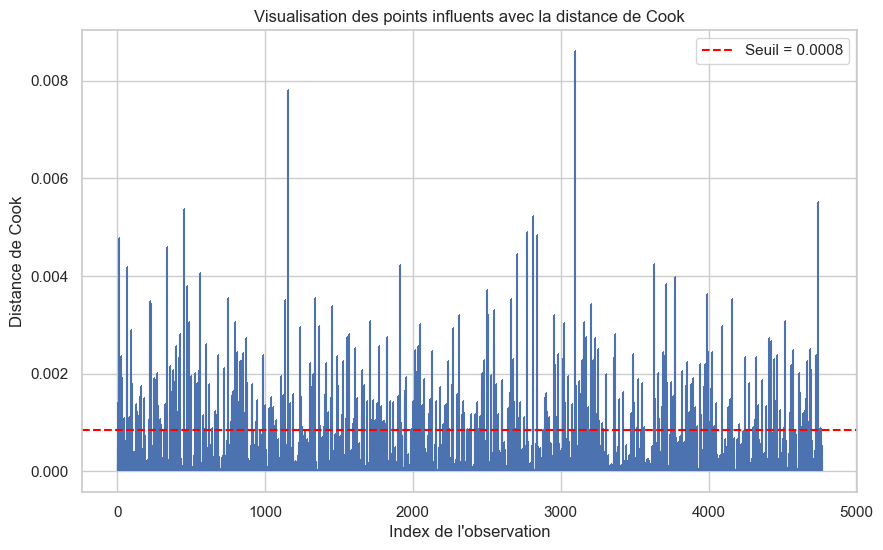

In [43]:
# on ajoute d'une constante aux données d'entraînement
X_train_const = sm.add_constant(hmeq_train)
model = sm.Logit(bad_train, X_train_const).fit(disp=0)

# distance de Cook pour chaque observation
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
threshold = 4 / len(hmeq_train) # on définit un seuil pourles observations

# index des points influents
influential_points = np.where(cooks_d > threshold)[0]
print(f"Nombre de points influents détectés : {len(influential_points)}")

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Seuil = {threshold:.4f}')
plt.xlabel('Index de l\'observation')
plt.ylabel('Distance de Cook')
plt.title('Visualisation des points influents avec la distance de Cook')
plt.legend()
plt.show()

In [44]:
# on filtre les indices influents pour ne garder que ceux présents dans hmeq_train
influential_points_to_remove = [idx for idx in influential_points if idx in hmeq_train.index]

# on les supprime ensuite de hmeq_train et de bad_train
hmeq_train_no_influential = hmeq_train.drop(index=influential_points_to_remove)
bad_train_no_influential = bad_train.drop(index=influential_points_to_remove)

print("Dimensions de hmeq_train après suppression des points influents :", hmeq_train_no_influential.shape)
print("Dimensions de bad_train après suppression des points influents :", bad_train_no_influential.shape)

Dimensions de hmeq_train après suppression des points influents : (4427, 13)
Dimensions de bad_train après suppression des points influents : (4427,)


<strong style="color: blue; font-size: 24px;">APPLICATION DE SMOTE POUR COMBLER LE DESEQUILIBRE DES CLASSES</strong> 

In [45]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(hmeq_train, bad_train)

# Vérification après SMOTE
print("Dimensions de X_train_sm après SMOTE :", X_train_sm.shape)
print("Distribution des classes après SMOTE :\n", y_train_sm.value_counts(normalize=True))

# Sauvegarder les variables SMOTEd pour les étapes suivantes
hmeq_train_sm = X_train_sm.copy()
bad_train_sm = y_train_sm.copy()

Dimensions de X_train_sm après SMOTE : (7634, 13)
Distribution des classes après SMOTE :
 0    0.5
1    0.5
Name: BAD, dtype: float64


<strong style="color: blue; font-size: 24px;">CORRELATION ET VERIFICATION DE LA MULTICOLINEARITE</strong> 

Matrice de corrélation de Pearson:
                                        YOJ     DEROG    DELINQ      NINQ  \
YOJ                                1.000000 -0.048205  0.083191 -0.106601   
DEROG                             -0.048205  1.000000  0.194153  0.196502   
DELINQ                             0.083191  0.194153  1.000000  0.057884   
NINQ                              -0.106601  0.196502  0.057884  1.000000   
DEBTINC_missing                   -0.024108  0.150659  0.205982  0.131709   
JOB_GROUP_Office and Professional -0.007410 -0.035361 -0.003731 -0.085895   
JOB_GROUP_Self-Employed and Sales -0.054751  0.018423  0.007684  0.017057   
REASON_HomeImp                     0.019588 -0.026260 -0.044488 -0.131235   
LOAN_VALUE_ratio_discretise        0.010134 -0.013823 -0.034668  0.069433   
MORTDUE_discretise                -0.068656 -0.046545  0.017042  0.023595   
CLAGE_discretise                   0.217932 -0.070638  0.061576 -0.118610   
CLNO_discretise                    0.0820

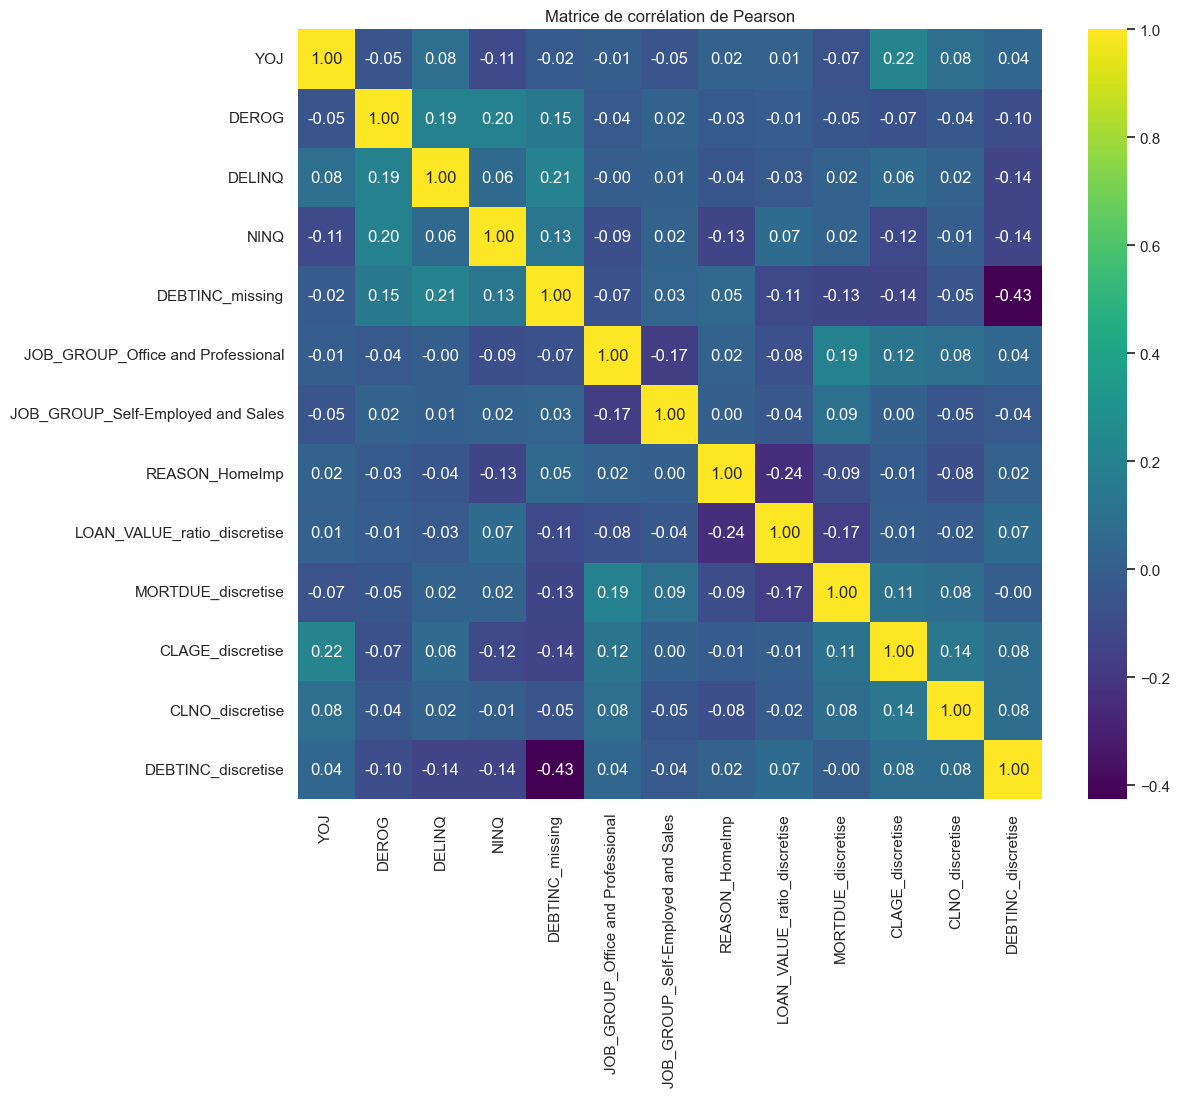

In [46]:
# on calcule de la matrice de corrélation de Pearson
pearson_corr = hmeq_train_sm.corr(method='pearson')
print("Matrice de corrélation de Pearson:")
print(pearson_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='viridis')
plt.title('Matrice de corrélation de Pearson')
plt.show()

In [47]:
# on ajoute une constante pour éviter les erreurs lors du calcul du VIF
hmeq_train_sm_with_const_vif = sm.add_constant(hmeq_train_sm)

# on calcule le VIF pour chaque variable explicative
vif_data_1 = pd.DataFrame()
vif_data_1["Variable"] = hmeq_train_sm_with_const_vif.columns
vif_data_1["VIF"] = [variance_inflation_factor(hmeq_train_sm_with_const_vif.values, i) for i in range(hmeq_train_sm_with_const_vif.shape[1])]

print(vif_data_1)

                             Variable       VIF
0                               const  2.967423
1                                 YOJ  1.082336
2                               DEROG  1.095045
3                              DELINQ  1.101706
4                                NINQ  1.106908
5                     DEBTINC_missing  1.339682
6   JOB_GROUP_Office and Professional  1.107380
7   JOB_GROUP_Self-Employed and Sales  1.056061
8                      REASON_HomeImp  1.111867
9         LOAN_VALUE_ratio_discretise  1.134279
10                 MORTDUE_discretise  1.151109
11                   CLAGE_discretise  1.121090
12                    CLNO_discretise  1.046360
13                 DEBTINC_discretise  1.251639


Aucune valeur n'est supérieure à 5, il n'y a donc pas de multicolinéarité apparente. Nous supposons que l'hypothèse d'absence de multicolinéarité est vérifiée

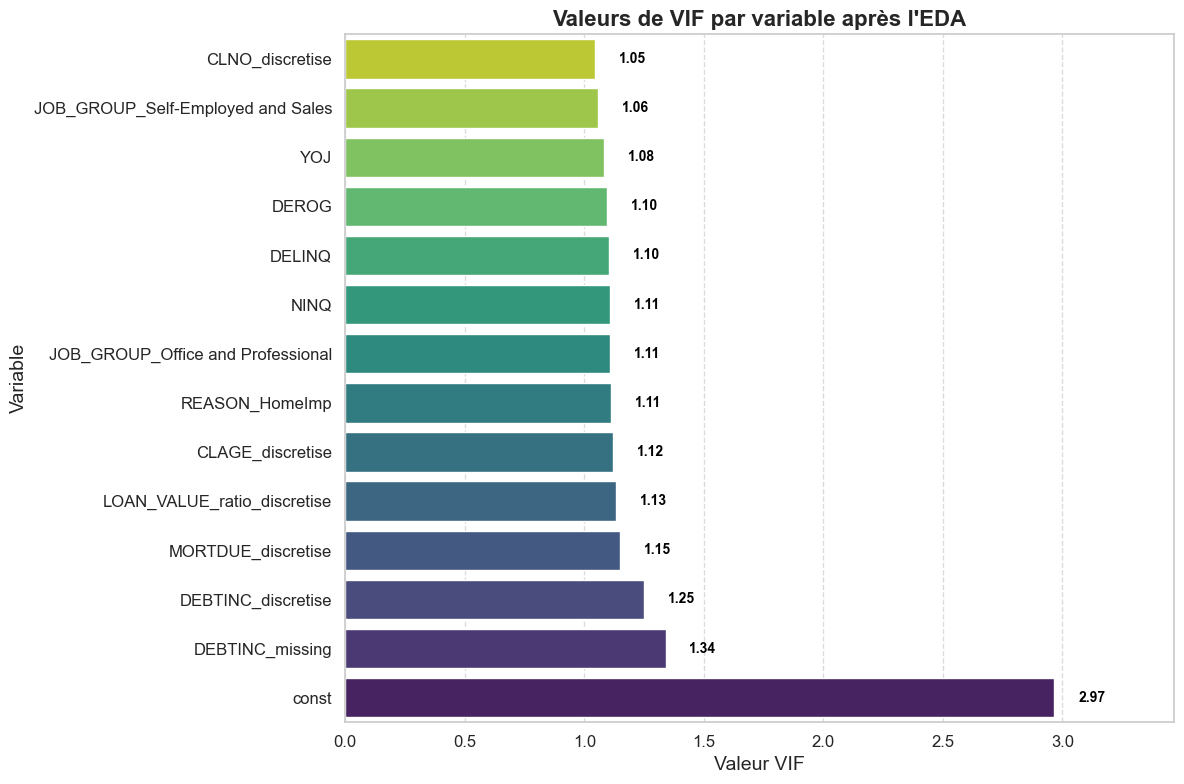

In [48]:
vif_data_updated = {"Variable": ["const", "YOJ", "DEROG", "DELINQ", "NINQ", "DEBTINC_missing", "JOB_GROUP_Office and Professional", "JOB_GROUP_Self-Employed and Sales", 
                                 "REASON_HomeImp", "LOAN_VALUE_ratio_discretise", "MORTDUE_discretise", "CLAGE_discretise", "CLNO_discretise", "DEBTINC_discretise"],
                                 "VIF": [2.966970, 1.082333, 1.095040, 1.101724, 1.106852, 1.339749, 1.107404, 1.056165, 1.111799, 1.134216, 
                                         1.151133, 1.121088, 1.046336, 1.251637]}

vif_df_updated = pd.DataFrame(vif_data_updated)
vif_df_updated_sorted = vif_df_updated.sort_values(by="VIF", ascending=False)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(x="VIF", y="Variable", data=vif_df_updated_sorted, palette="viridis", hue="Variable", dodge=False, legend=False)

for index, value in enumerate(vif_df_updated_sorted["VIF"]):
    plt.text(value + 0.1, index, f"{value:.2f}", color='black', va="center", fontsize=10, fontweight='bold')

plt.title("Valeurs de VIF par variable après l'EDA", fontsize=16, weight='bold')
plt.xlabel("Valeur VIF", fontsize=14)
plt.ylabel("Variable", fontsize=14)
plt.xlim(0, max(vif_df_updated_sorted["VIF"]) + 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<strong style="color: blue; font-size: 24px;">SELECTION DES VARIABLES PAR LASSO</strong> 

On effectue une recherche des meilleurs paramètres pour un modèle de régression logistique avec pénalisation L1 (Lasso) afin de sélectionner les variables les plus importantes en réduisant certains coefficients à zéro.

In [49]:
# Modèle de régression logistique avec régularisation L1 (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear')

# on met en place un Grid search pour trouver la meilleure valeur de C (hyperparamètre de régularisation)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}  # ça sert à réduire les valeurs de C pour augmenter la régularisation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='accuracy')
grid_search.fit(hmeq_train_sm, bad_train_sm)  
# on choisit ensuite le meilleur modèle trouvé par GridSearchCV
best_lasso = grid_search.best_estimator_

print("Coefficients des variables avec Lasso :\n", best_lasso.coef_)

selected_features = hmeq_train_sm.columns[(best_lasso.coef_ != 0).ravel()]
print("Variables sélectionnées par Lasso :\n", selected_features)

Coefficients des variables avec Lasso :
 [[-0.01016213  0.24978346  0.62535191  0.03540196  1.61603905 -0.36454428
   0.          0.          0.          0.         -0.83942594  0.
  -0.52985694]]
Variables sélectionnées par Lasso :
 Index(['YOJ', 'DEROG', 'DELINQ', 'NINQ', 'DEBTINC_missing',
       'JOB_GROUP_Office and Professional', 'CLAGE_discretise',
       'DEBTINC_discretise'],
      dtype='object')


Ce modèle sélectionne les variables 'YOJ', 'DEROG', 'DELINQ', 'NINQ', 'DEBTINC_missing',
       'JOB_GROUP_Office and Professional', 'CLAGE_discretise',
       'DEBTINC_discretise'

<strong style="color: blue; font-size: 24px;">MODELISATION DE BAD SANS PRESENCE DE POINTS INFLUENTS</strong> 

In [50]:
# on créé un DataFrame avec les variables sélectionnées par Lasso
X_lasso_selected = hmeq_train_sm[selected_features].copy()

# on ajoute une constante aux données pour inclure l'intercept
X_lasso_selected_const = sm.add_constant(X_lasso_selected)

# ajuste le modèle de régression logistique avec Lasso
logit_model_lasso = sm.Logit(bad_train_sm, X_lasso_selected_const).fit()

print(logit_model_lasso.summary())

Optimization terminated successfully.
         Current function value: 0.423346
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 7634
Model:                          Logit   Df Residuals:                     7625
Method:                           MLE   Df Model:                            8
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.3892
Time:                        12:28:20   Log-Likelihood:                -3231.8
converged:                       True   LL-Null:                       -5291.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6343      0.042    -15

In [51]:
# on sélectionne les mêmes variables dans l'ensemble de test puis on répète le même processus
X_test_selected = hmeq_test[selected_features].copy()
X_test_selected_const = sm.add_constant(X_test_selected)

# on obtient des prédictions de probabilité avec le modèle de régression logistique ajusté qu'on convertit ensuite en en classes (1 si proba >= 0.5, sinon 0)
y_pred_proba = logit_model_lasso.predict(X_test_selected_const)
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Prédictions de la variable BAD :\n", y_pred)

Prédictions de la variable BAD :
 4798    0
3716    0
1472    0
1050    1
87      1
       ..
4053    0
2825    0
1383    0
4111    0
4197    0
Length: 1192, dtype: int32


In [52]:
# on calcule l'accuracy, le f1 score et l'AUC_ROC
accuracy = accuracy_score(bad_test, y_pred)
print("Accuracy :", accuracy)

f1 = f1_score(bad_test, y_pred)
print("F1 Score :", f1)

auc_roc = roc_auc_score(bad_test, y_pred_proba)
print("AUC-ROC :", auc_roc)

print("Rapport de classification :\n", classification_report(bad_test, y_pred))

Accuracy : 0.8296979865771812
F1 Score : 0.6394316163410302
AUC-ROC : 0.8613203142892378
Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       954
           1       0.55      0.76      0.64       238

    accuracy                           0.83      1192
   macro avg       0.74      0.80      0.76      1192
weighted avg       0.86      0.83      0.84      1192



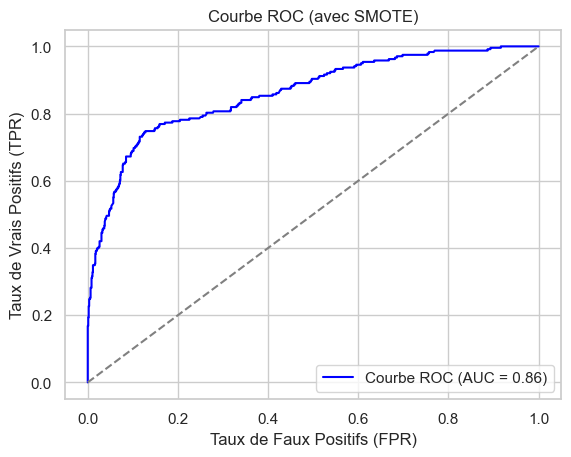

In [53]:
# les probabilités de prédiction pour la classe positive (BAD=1) sont déterminés
y_pred_proba = logit_model_lasso.predict(X_test_selected_const)

# on calcule la courbe ROC, l'AUC
fpr, tpr, thresholds = roc_curve(bad_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Ligne de chance
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC (avec SMOTE)')
plt.legend(loc="lower right")
plt.show()

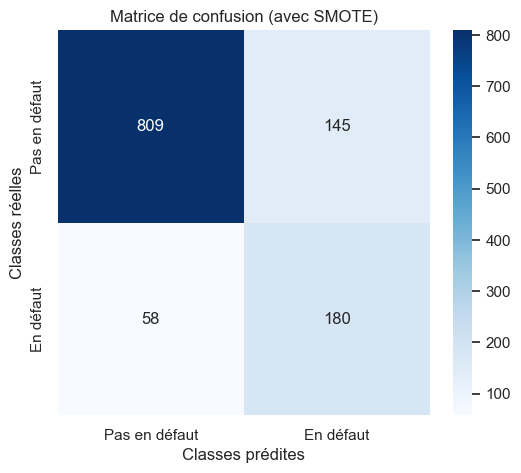

In [54]:
# Matrice de confusion 
cm = confusion_matrix(bad_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=['Pas en défaut', 'En défaut'], 
            yticklabels=['Pas en défaut', 'En défaut'])
plt.title("Matrice de confusion (avec SMOTE)")
plt.xlabel("Classes prédites")
plt.ylabel("Classes réelles")

plt.show()

In [55]:
print(logit_model_lasso.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 7634
Model:                          Logit   Df Residuals:                     7625
Method:                           MLE   Df Model:                            8
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.3892
Time:                        12:28:21   Log-Likelihood:                -3231.8
converged:                       True   LL-Null:                       -5291.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.6343      0.042    -15.088      0.000      -0.717      -0.552
YOJ                                  -0.0860      0.034     -2

Ce tableau présente les résultats finaux de la régression logistique visant à prédire la probabilité de défaut (BAD) en fonction de plusieurs variables explicatives (en adoptant la méthode SMOTE). Les coefficients indiquent l’impact de chaque variable sur le log-odds de défaut, toutes choses étant égales par ailleurs. Un coefficient positif implique une augmentation de la probabilité de défaut, tandis qu’un coefficient négatif indique une réduction.

Toutes les variables présentées ici sont significatives (p-value < 0,05), telles que DEROG, DELINQ, DEBTINC_missing, ainsi que les variables discrétisées CLAGE_diiscretise et DEBTINC_discretise. Ces résultats montrent que les antécédents de défaillance de paiement (DELINQ), les dérogations (DEROG), et l’absence de valeur pour le ratio dette/revenu (DEBTINC_missing) sont particulièrement influents dans la prédiction d’un défaut de paiement.

Les variables YOJ et NINQ, bien que significatives, présentent un faible coefficient, indiquant un impact moindre sur le risque de défaut par rapport aux autres variables. En revanche, des variables comme JOB_GROUP_Office and Professional, avec un coefficient négatif, semblent indiquer un profil moins risqué pour certains types d’emplois.

En conclusion, ce modèle final met en avant les variables ayant un impact significatif sur la probabilité de défaut, permettant de cibler les facteurs les plus importants pour la prédiction de défaut.

<strong style="color: blue; font-size: 24px;">TEST D'AJUSTEMENT / TEST OF GOODNESS-OF-FIT</strong> 

<strong style="color: blue; font-size: 16px;">Le test de Hosmer-Lemeshow permet d’évaluer la qualité de l’ajustement d’un modèle de régression logistique en comparant les probabilités prédites aux observations réelles. Une p-value élevé (généralement > 0,05) indique que le modèle s’ajuste bien aux données, tandis qu’un p-value faible suggère un manque d’ajustement, ce qui peut indiquer des lacunes dans la capacité du modèle à bien représenter les données observées.</strong> 

Statistique de Hosmer-Lemeshow : 9.653846119658702
p-value du test de Hosmer-Lemeshow : 0.47136906139691037
Conclusion : La p-value est supérieure à 0,05. Le modèle semble bien ajusté aux données.


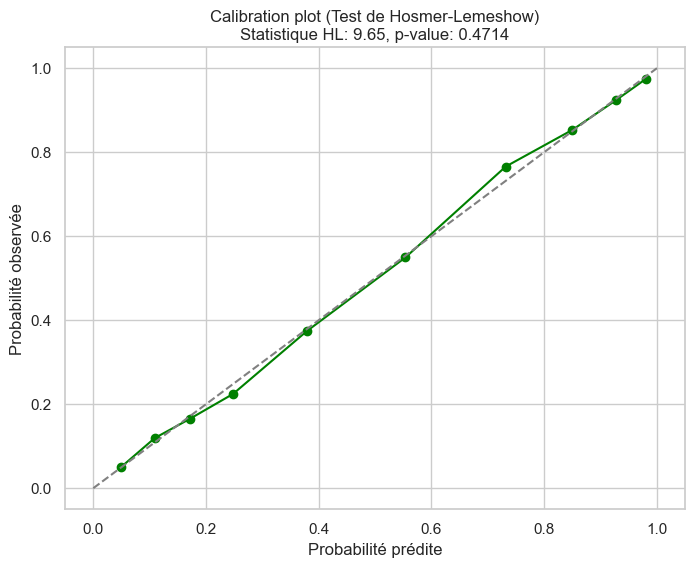

In [56]:
from scipy.stats import chi2
# on calcule les probabilités prédites sur les données d'entraînement sans points influents
y_pred_proba_train_sans_pts_inf = logit_model_lasso.predict(X_lasso_selected_const)

# on créé un DataFrame pour regrouper les observations par déciles de probabilités prédites
df_hl = pd.DataFrame({'BAD': bad_train_sm, 'Predicted_Prob': y_pred_proba_train_sans_pts_inf})
df_hl['Decile'] = pd.qcut(df_hl['Predicted_Prob'], q=10)

# il s'agit du d'observations dans chaque décile sans générer de warnings
hl_table = df_hl.groupby('Decile').apply(lambda x: pd.Series({
    'Observed_Default': x['BAD'].sum(),
    'Observed_NonDefault': len(x) - x['BAD'].sum(),
    'Expected_Default': x['Predicted_Prob'].sum(),
    'Expected_NonDefault': len(x) - x['Predicted_Prob'].sum()
})).reset_index(drop=True)

# on effectue le test de chi-deux entre les observations et les attentes pour les deux classes
hl_stat = ((hl_table['Observed_Default'] - hl_table['Expected_Default'])**2 / hl_table['Expected_Default'] + 
           (hl_table['Observed_NonDefault'] - hl_table['Expected_NonDefault'])**2 / hl_table['Expected_NonDefault']).sum()

# degrés de liberté : nombre de groupes - 2
dof = hl_table.shape[0] 
p_value_hl = chi2.sf(hl_stat, df=dof)  

print("Statistique de Hosmer-Lemeshow :", hl_stat)
print("p-value du test de Hosmer-Lemeshow :", p_value_hl)

if p_value_hl > 0.05:
    print("Conclusion : La p-value est supérieure à 0,05. Le modèle semble bien ajusté aux données.")
else:
    print("Conclusion : La p-value est inférieure ou égale à 0,05. Le modèle présente un manque d'ajustement aux données.")

# calibration plot
calibration_summary = df_hl.groupby('Decile').agg({'Predicted_Prob': 'mean', 'BAD': 'mean'}).rename(columns={'BAD': 'Observed'}).reset_index()

plt.figure(figsize=(8, 6))
plt.plot(calibration_summary['Predicted_Prob'], calibration_summary['Observed'], marker='o', linestyle='-', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de parfait ajustement
plt.xlabel('Probabilité prédite')
plt.ylabel('Probabilité observée')
plt.title(f"Calibration plot (Test de Hosmer-Lemeshow)\nStatistique HL: {hl_stat:.2f}, p-value: {p_value_hl:.4f}")
plt.show()

<strong style="color: blue; font-size: 16px;">Notre modèle semble être bien ajusté.</strong> 